# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
1. Murder -- Muder rates in different places of United States
2. Assualt- Assualt rate in different places of United States
3. UrbanPop - urban population in different places of United States
4. Rape - Rape rate in different places of United States

## Exploratory Data Analysis

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

In [2]:
# loading the dataset into a dataframe
df = pd.read_csv('crime_data.csv')

In [3]:
# getting the first 5 samples to get a sense of the data
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

We would like the feature name to be reflective of its contents. So, we rename 'Unnamed: 0'

In [4]:
# renaming one column name for better readability and comprehension
df.rename(columns = {'Unnamed: 0':'State'}, inplace = True)

In [5]:
# getting number of samples, na values in each column, and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


We have 4 numeric features and one textual feature which will be unnecessary for clustering. There are no null values in any feature. We have 50 total samples

In [6]:
# checking unique values in each feature
df.nunique()

State       50
Murder      43
Assault     45
UrbanPop    36
Rape        48
dtype: int64

We have 50 unique states, so we are assured that data has not been repeated

In [7]:
# getting a sense of the distribution of the numeric features
df.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

All features have different scales, and ranges

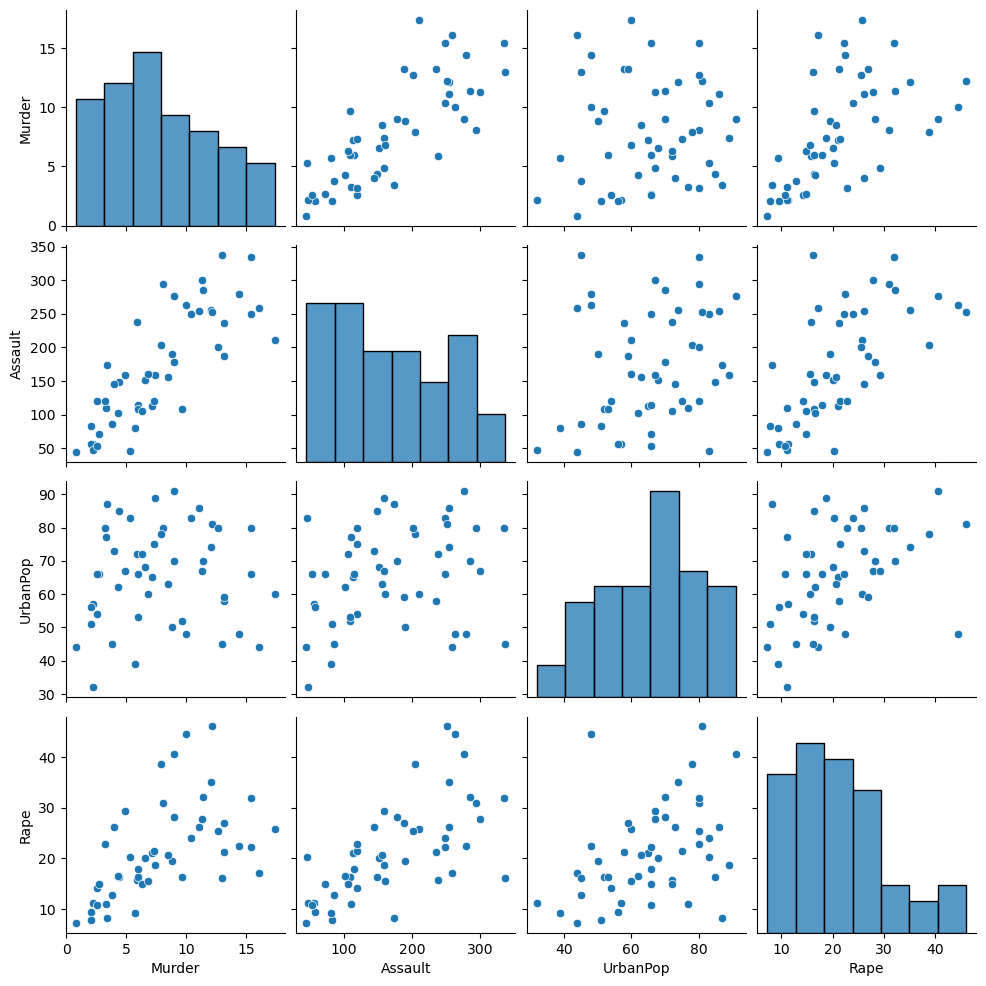

In [8]:
sns.pairplot(df)

Murder and Assault seem correlated

<Axes: >

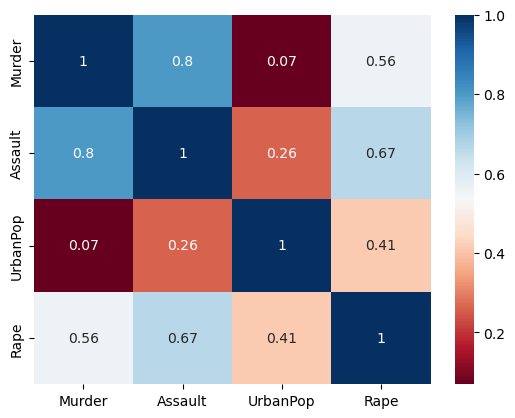

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'RdBu')

Assault and Murder have high correlation, as do Assault and Rape

In [10]:
# Setting State name as the index as it is a better indicator of each sample and cannot be used in clustering algorithms
df.set_index('State', inplace = True)

## Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler

# standardizing each feature
std_df = StandardScaler().fit_transform(df)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing each feature
norm_df = MinMaxScaler().fit_transform(df)

## Hierarchical Clustering

As manhattan distance metric is used for categorical data, or data which resembles a grid like structure, it will not be applicable here. Cosine distance metric is used when data has very large numbers of dimensions or for textual data. Hence, we won't be using it here either. We will stick with euclidean distance metric.

Some pros and cons of each linkage method are:
1. Single linkage: 
    - Pros - Good for identifying outliers and detecting small clusters. 
    - Cons - May not capture overall structure well and can be sensitive to noise.
2. Complete linkage: 
    - Pros - Forms compact, well-defined clusters. 
    - Cons - Can merge nearby clusters that are not particularly similar.
3. Average linkage: 
    - Pros - Can capture overall structure well and strikes a balance between single and complete linkage. 
    - Cons - Can be sensitive to noise and outliers.
4. Ward's method: 
    - Pros - Forms well-defined clusters of similar size and minimizes variance. 
    - Cons - Can be sensitive to outliers and noise.
    
    
      
        
Some pros and cons of each distance metric are:
1. Euclidean distance:
    - Pros: It is simple and fast to compute. It works well when the data has a continuous feature space with no categorical features.
    - Cons: It is sensitive to the scale of the features. It assumes that all features are equally important and can be problematic when there are categorical features.
2. Manhattan distance:
    - Pros: It is also simple and fast to compute. It works well when the data has a continuous feature space or ordinal features with no nominal features, and it is less sensitive to outliers than Euclidean distance.
    - Cons: It assumes that all features are equally important and does not work well when there are categorical features.
3. Cosine similarity:
    - Pros: It is often used for text clustering and other applications where the direction of the data is more important than its magnitude. It is also not sensitive to the scale of the features.
    - Cons: It does not take into account the magnitude of the data, which can be important in some applications.

### For raw data

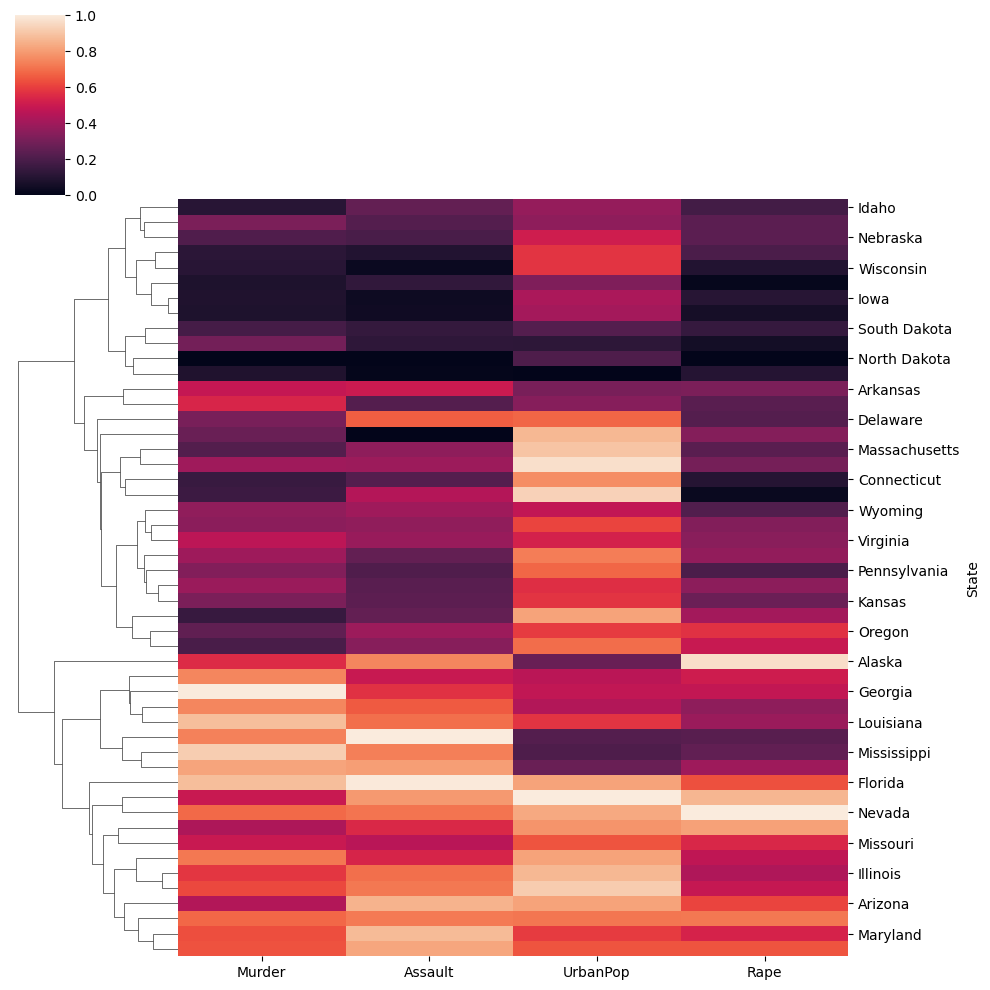

In [13]:
# To get a visual representation of the hierarchical clustering
sns.clustermap(df, standard_scale= True, col_cluster = False)

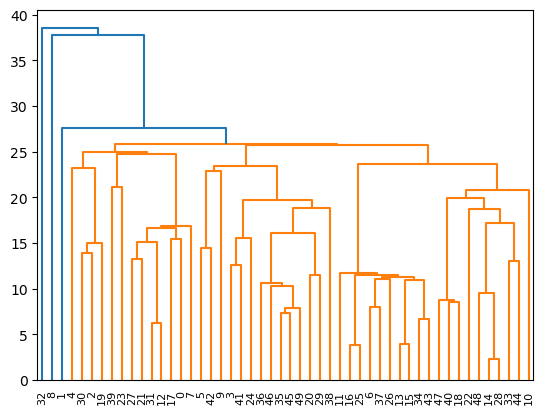

In [16]:
# Another visual representation of hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
dgram = dendrogram(linkage(df, optimal_ordering=True))

In [19]:
# Importing metrics useful for evaluating unsupervised learning models
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette coefficients tell us how similar a sample is to it's cluster than it's nearest cluster. 1 means it is perfectly clustered, 0 means it is at the boundary of two clusters and negative values mean it is more similar to the nearest cluster. Negative values go upto -1 which means the sample should be in the other cluster

#### For Ward linkage

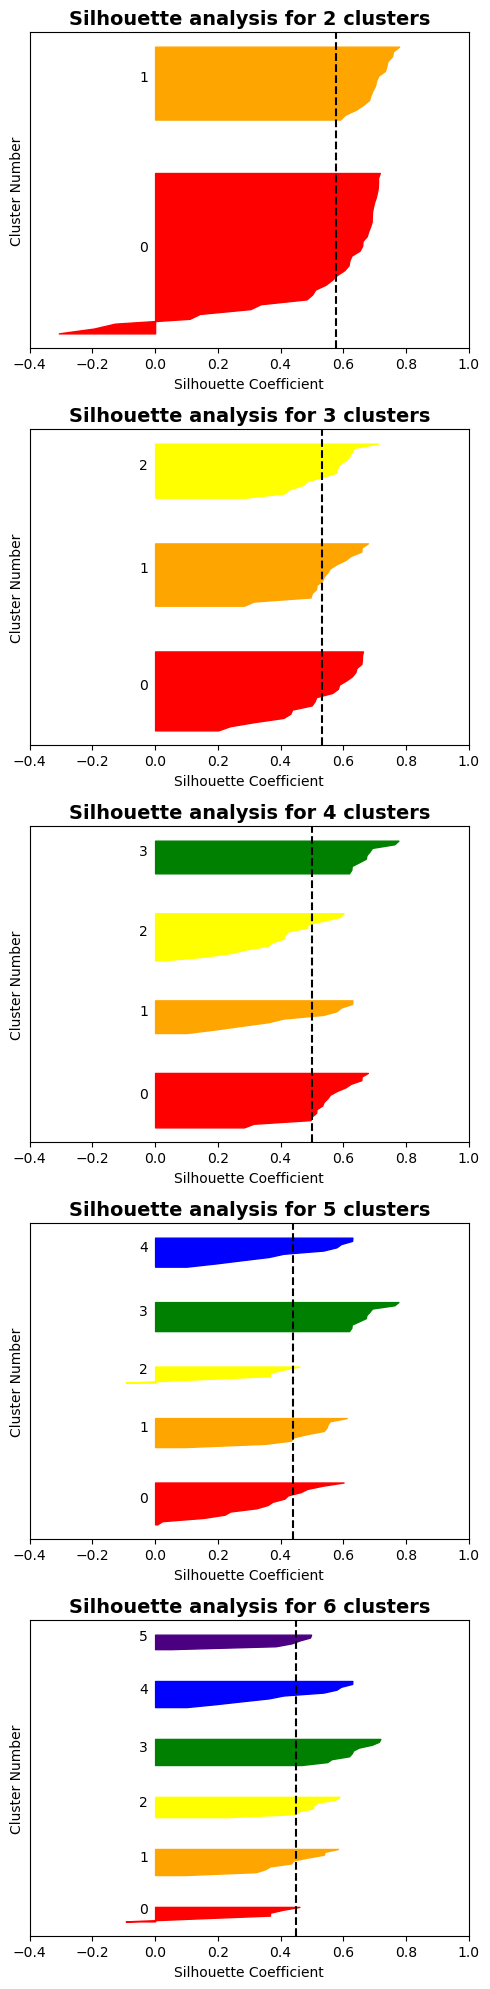

In [21]:
# Code for plotting silhouette coefficients for different clusters sizes. 
# This helps us determine cluster sizes for which samples are evenly distributed for each label, 
# and samples which have negative silhouette values (meaning they are incorrectly clustered)

# plotting for cluster size 2 to 6
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
# creating subplots for each cluster size
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
# iterating for each cluster size and creating the plot
for i, n_clusters in enumerate(range_n_clusters):
    # applying hierarchical clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    # getting labels for each sample
    cluster_labels = clusterer.fit_predict(df)
    # getting average silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    # getting silhouette score for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    # creating a list of colors to be used for each cluster to differentiate them
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    # setting a gap of 10 from x axis
    y_lower = 10
    # iterating over each cluster and plotting its silhouette's
    for cl in range(n_clusters):
        # getting silhouette values for ith cluster
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        # sorting these values for better visualization
        clth_cluster_silhouette_values.sort()
        # getting size of the cluster
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        # creating upper bound on y axis for this cluster
        y_upper = y_lower + size_cluster_cl
        # for the defined y values of this cluster, fill color between 0 and the silhouette value of each sample
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        # writing the cluster label at the center of each cluster
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        # padding by 10 on y axis before starting to plot the next cluster
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    # We do not expect misclustering to be very high, so setting lowest bound on x axis as -0.4 so that all plots match up of the y axis
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

We can see that for 3 clusters, there is no misclustering, the average silhouette coefficient is high, and cluster size is about same as well

#### For single linkage

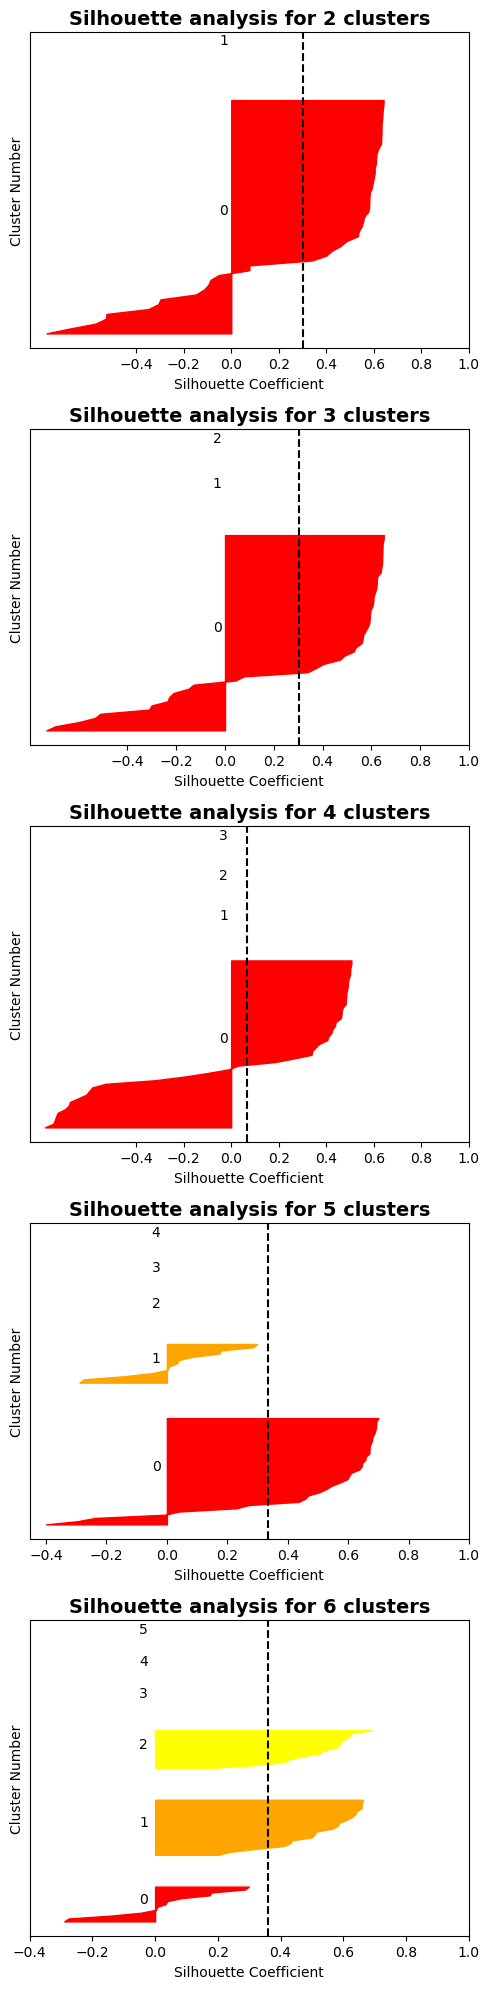

In [36]:
# Silhouette Analysis for single linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'single')
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

We can see that single linkage does not perform well with clustering here. Single linkage clustering is used for stretched out or irregularly shaped clusters, and has disadvantages like creating long chains or dissimilar datapoints

#### For average linkage

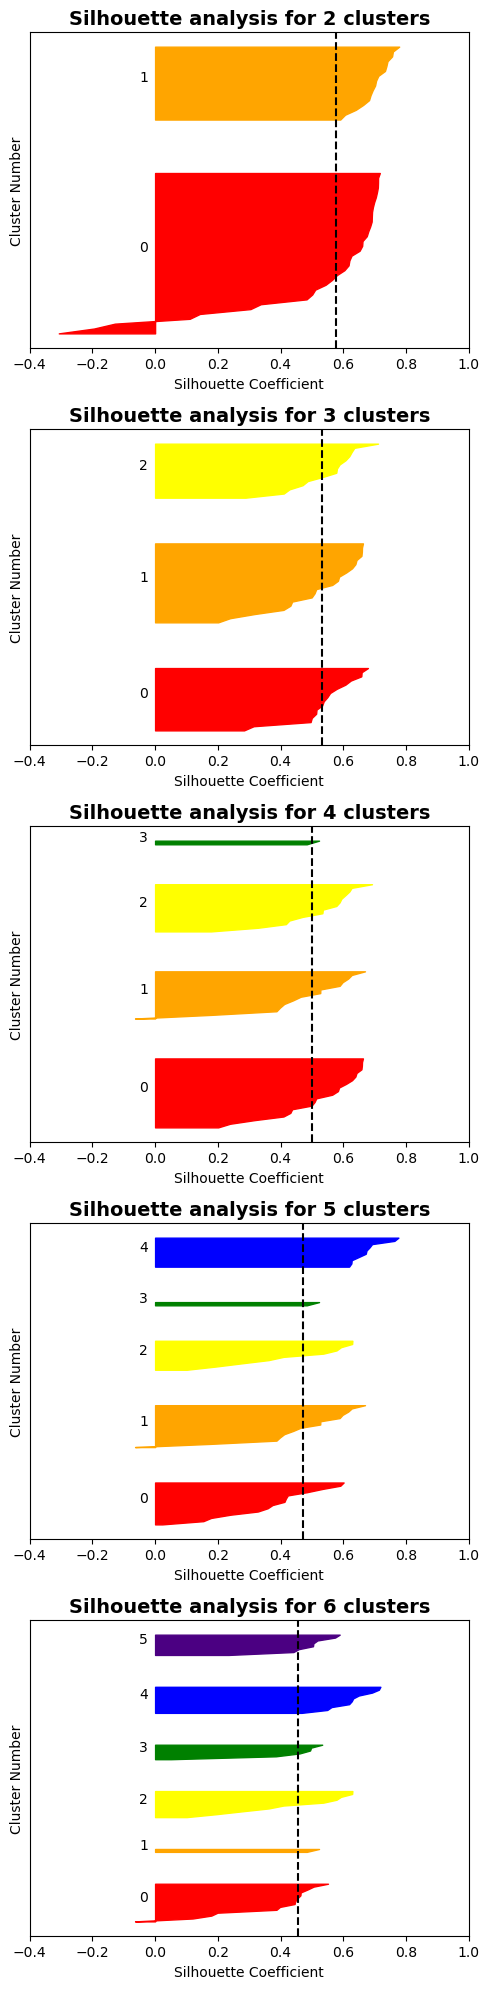

In [39]:
# Silhouette Analysis for average linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

same as ward, average linkage performs well if there are 3 clusters. 

#### For complete linkage

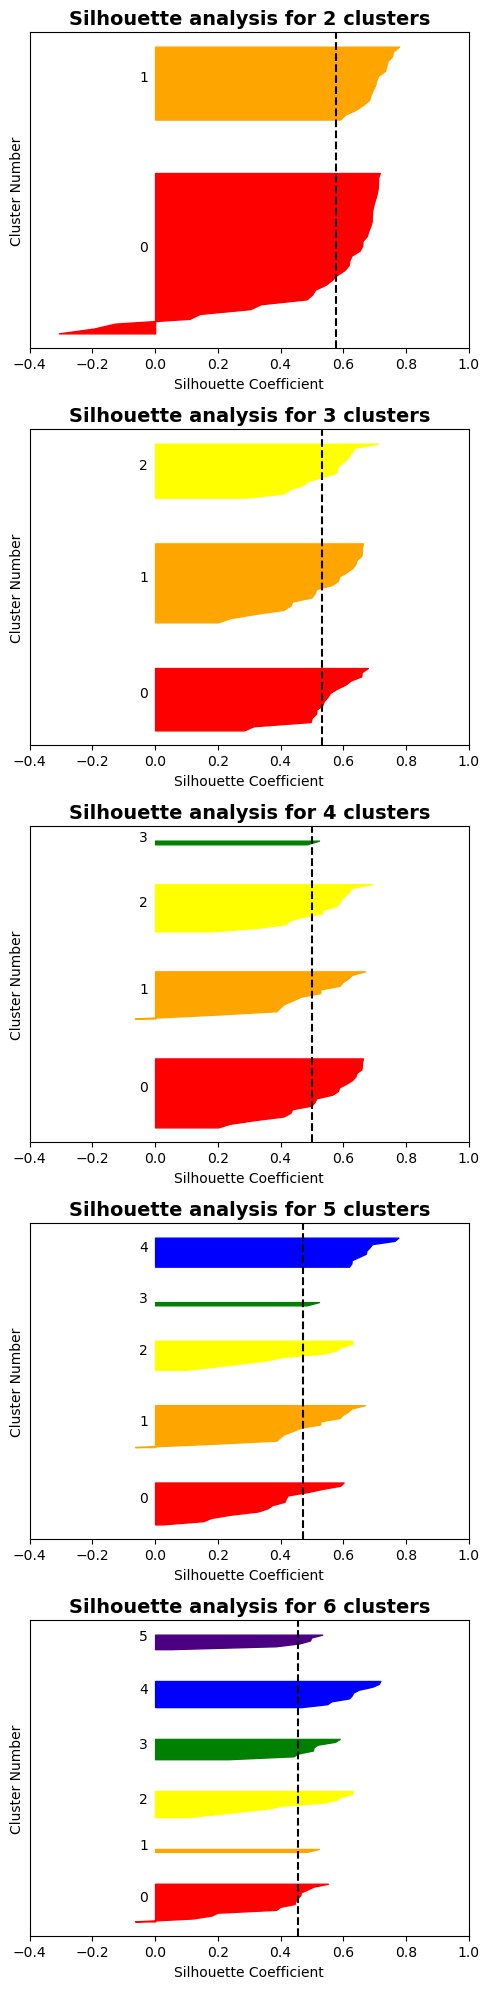

In [38]:
# Silhouette Analysis for complete linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'complete')
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

Complete linkage provides best clustering with 3 clusters as well.

In [136]:
# Getting silhouette scores for each linkage
for linkage in ['ward', 'single', 'average', 'complete']:
    agg = AgglomerativeClustering(n_clusters= 3, linkage= linkage)
    print(f"The average Silhouette Score for {linkage} linkage is {silhouette_score(df, agg.fit_predict(df))}")

The average Silhouette Score for ward linkage is 0.5319024108339817
The average Silhouette Score for single linkage is 0.30445536048778465
The average Silhouette Score for average linkage is 0.5319024108339817
The average Silhouette Score for complete linkage is 0.5319024108339817


We can see that silhouette scores are the same for ward, average, and complete linkages. Hence, our default linkage works as well as others, and we will select it

In [137]:
# getting the final hierarchical clusters and adding labels to a dataframe with our data
agg = AgglomerativeClustering(n_clusters=3)
clabel = pd.DataFrame(agg.fit_predict(df), columns = ['clabel'], index = df.index)
hierarchically_clustered = pd.concat([df, clabel], axis = 1)
hierarchically_clustered['State'] = hierarchically_clustered.index
hierarchically_clustered.sort_values(['clabel','UrbanPop'], inplace=True)

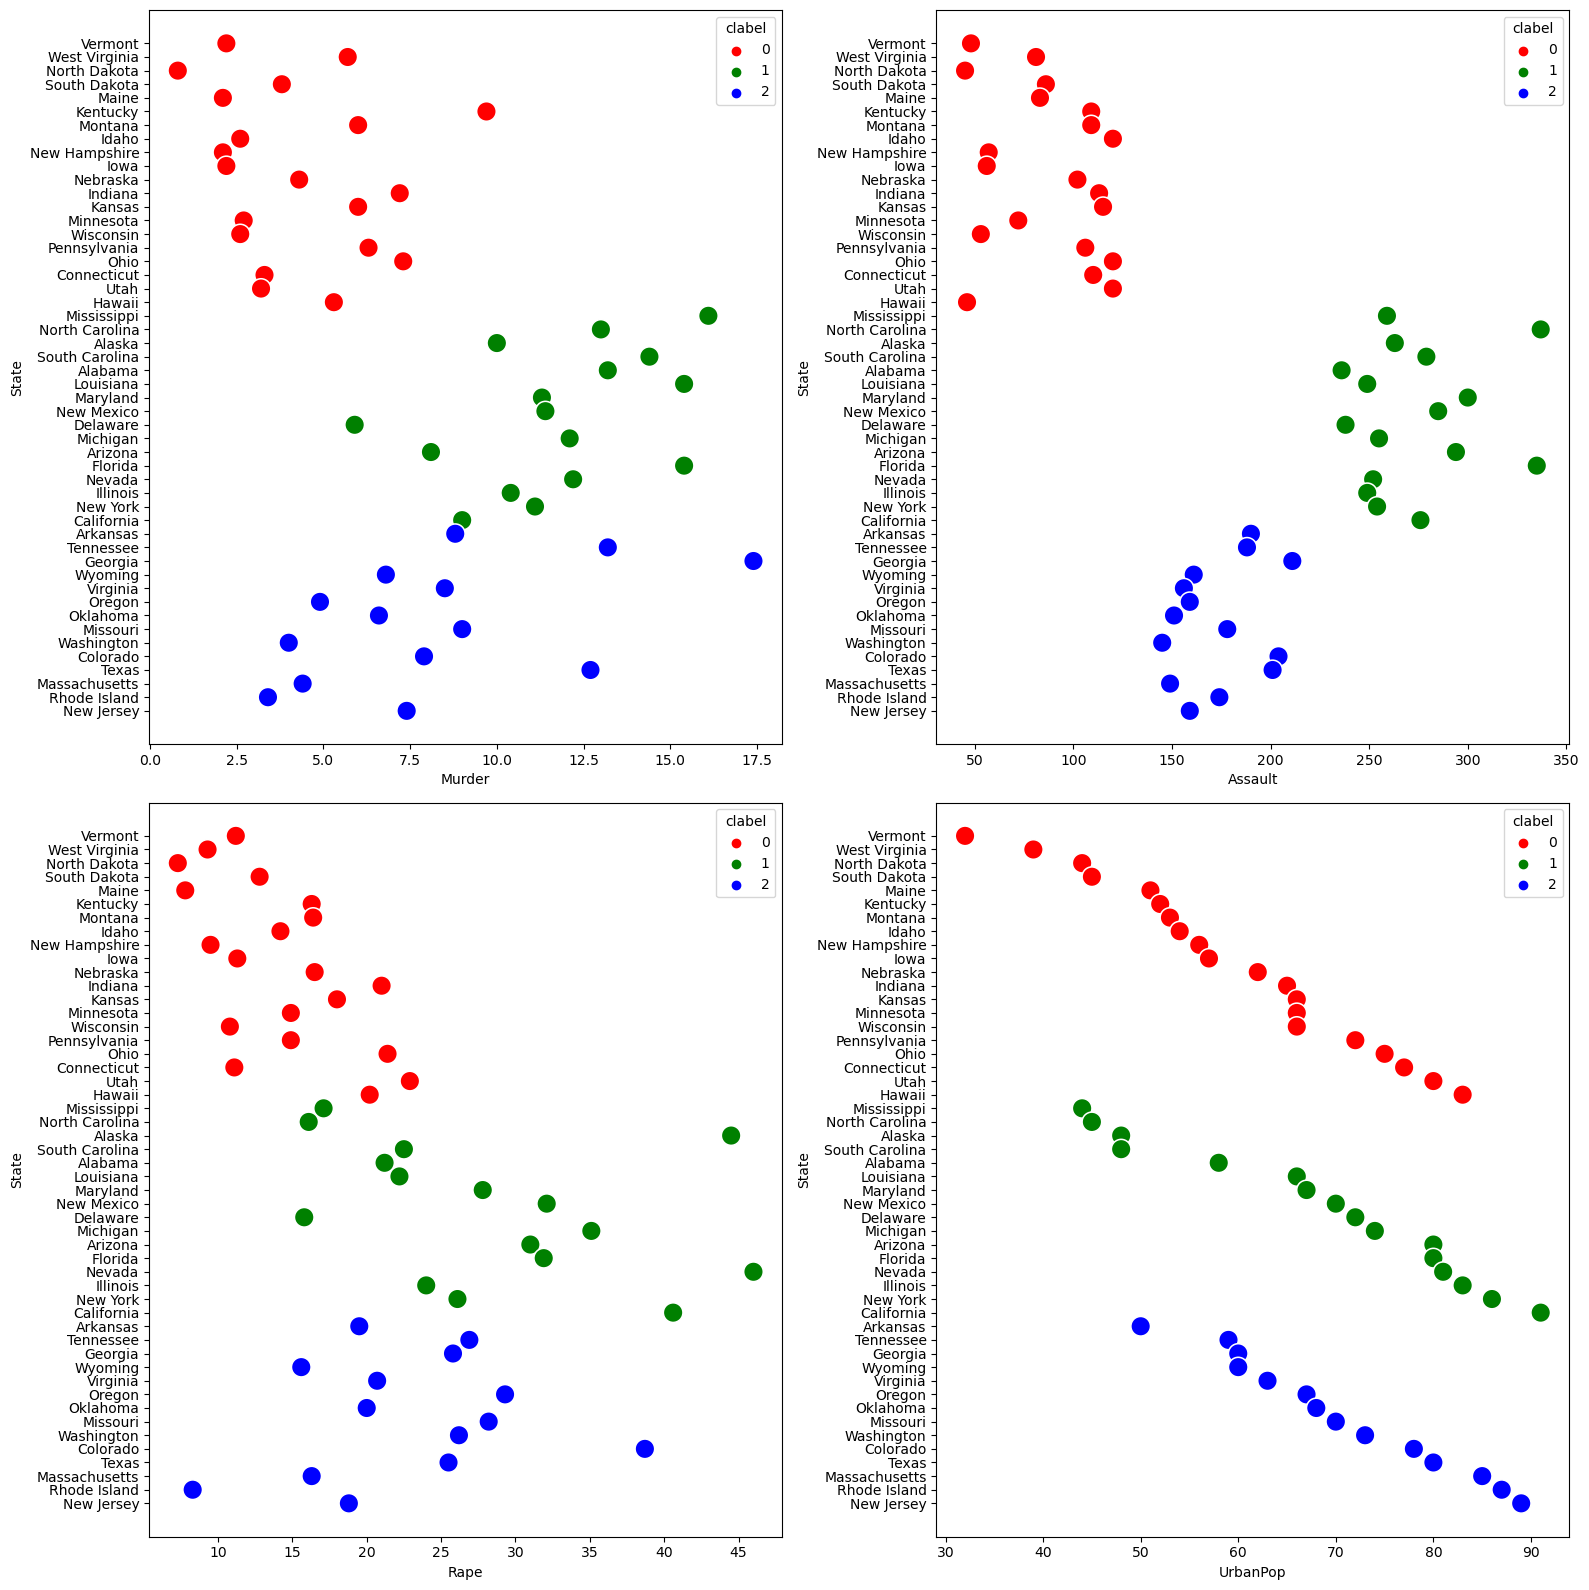

In [138]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))
sns.scatterplot(hierarchically_clustered, x = 'Murder', y = 'State', hue = 'clabel', ax= axes[0,0], palette=['red','green','blue'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Assault', y = 'State', hue = 'clabel', ax= axes[0,1], palette=['red','green','blue'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Rape', y = 'State', hue = 'clabel', ax= axes[1,0], palette=['red','green','blue'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'UrbanPop', y = 'State', hue = 'clabel', ax= axes[1,1], palette=['red','green','blue'], s = 200)
plt.tight_layout()
plt.show()

Group 0 has low levels of all crime. Group 1 has highest levels of crime with clear clustering seen for Assault which is correlated with other crimes. Group 2 has lower levels of Assault than Group 1 and is evident clearly in the visualization. Rape and Murder for groups 1 and 2 are somewhat sparse, but overall Group 2 is slightly lower than Group 1.   
It would be best to live in a state from Group 0. If that is not possible, then Group 2 is preferrable than Group 1, as it has lower levels of assault.

In [103]:
# Statistics for each group
hierarchically_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                         Assault                          \
          min   max       mean median     min  max        mean median   
clabel                                                                  
0         0.8   9.7   4.270000   3.55      45  120   87.550000   94.0   
1         5.9  16.1  11.812500  11.75     236  337  272.562500  261.0   
2         3.4  17.4   8.214286   7.65     145  211  173.285714  167.5   

       UrbanPop                        Rape                          
            min max       mean median   min   max       mean median  
clabel                                                               
0            32  83  59.750000   59.5   7.3  22.9  14.390000  14.55  
1            44  91  68.312500   71.0  15.8  46.0  28.375000  26.95  
2            50  89  70.642857   69.0   8.3  38.7  22.842857  23.10

### For standardized data

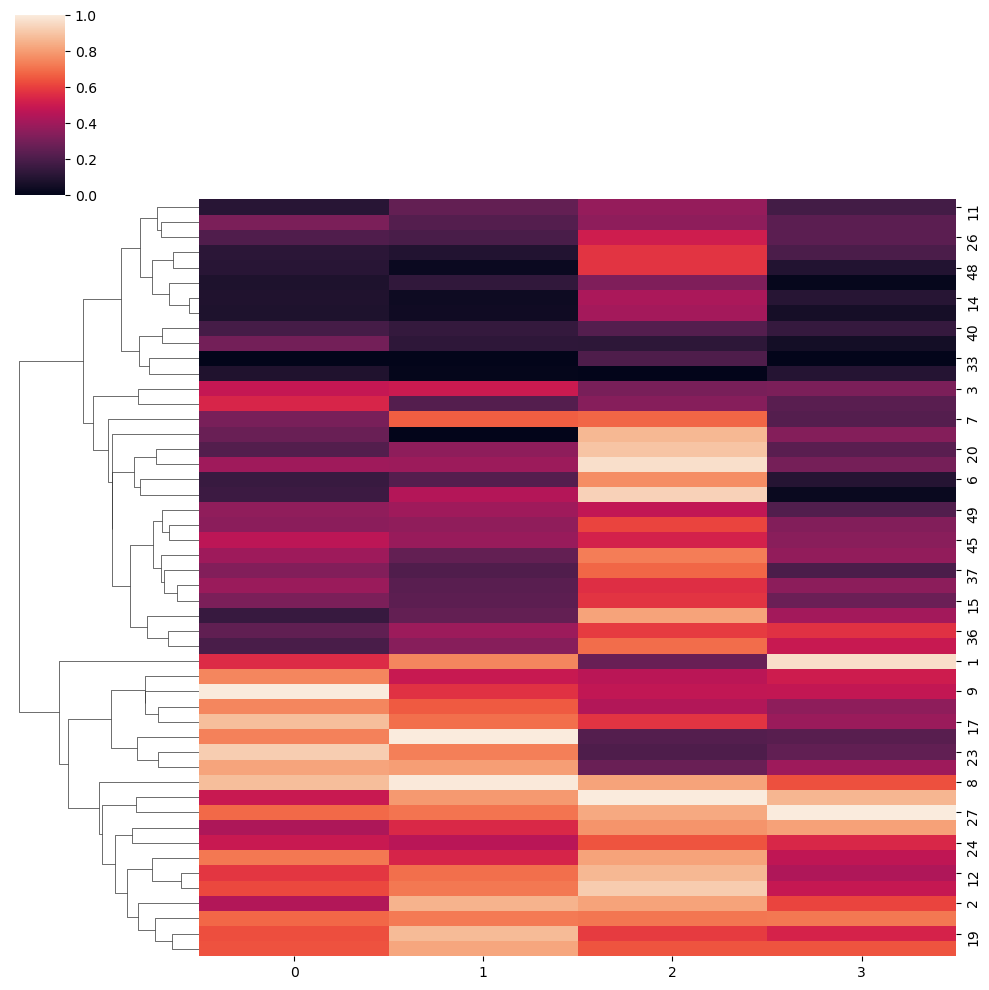

In [104]:
# To get a visual representation of the hierarchical clustering
sns.clustermap(std_df, standard_scale= True, col_cluster = False)

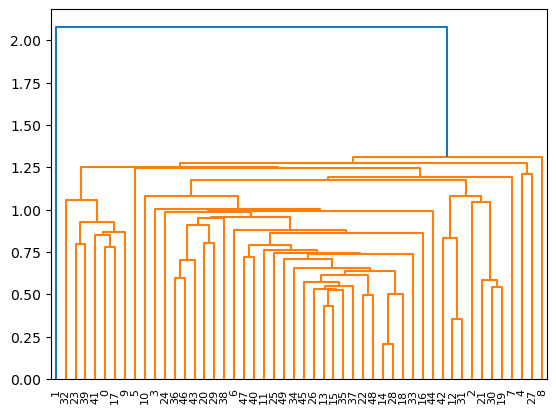

In [105]:
# Another visual representation of hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
dgram = dendrogram(linkage(std_df, optimal_ordering=True))

#### For Ward linkage

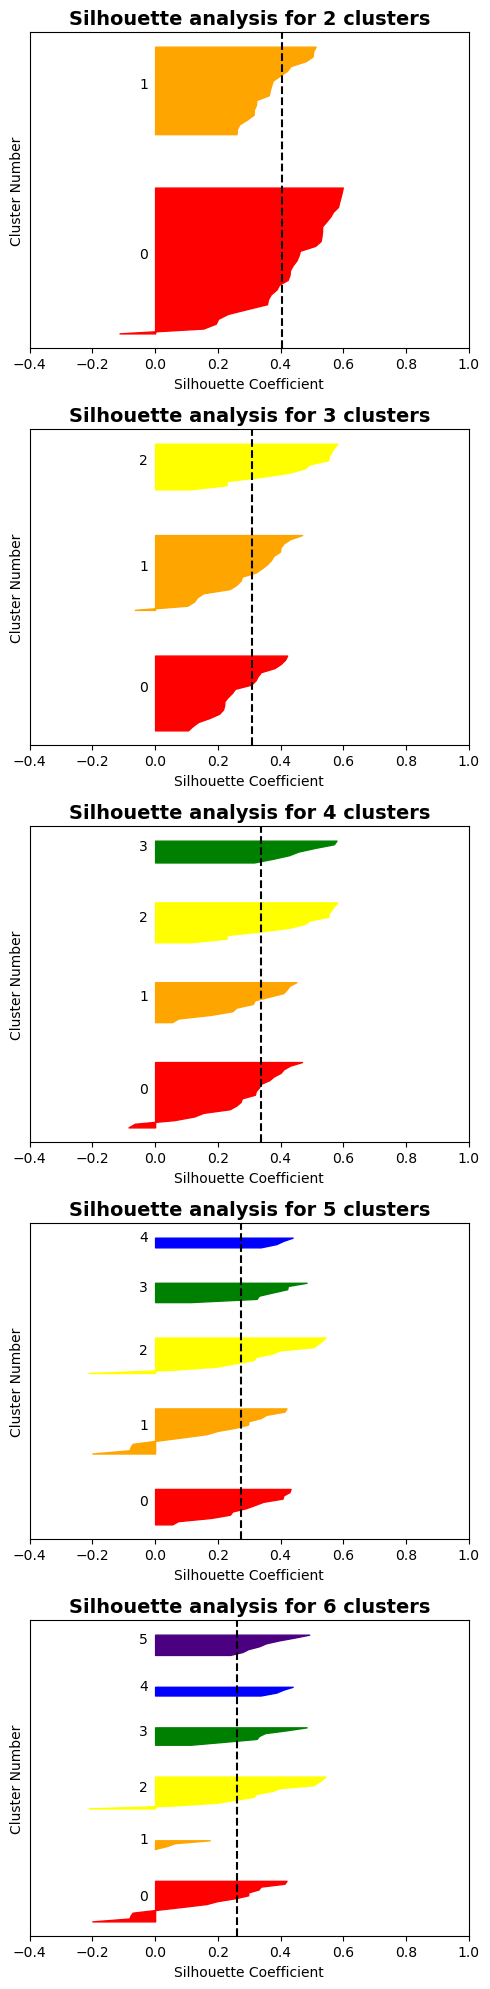

In [139]:
# Silhouette coefficients for Ward linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
# creating subplots for each cluster size
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
# iterating for each cluster size and creating the plot
for i, n_clusters in enumerate(range_n_clusters):
    # applying hierarchical clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    # getting labels for each sample
    cluster_labels = clusterer.fit_predict(std_df)
    # getting average silhouette score
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    # getting silhouette score for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    # creating a list of colors to be used for each cluster to differentiate them
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    # setting a gap of 10 from x axis
    y_lower = 10
    # iterating over each cluster and plotting its silhouette's
    for cl in range(n_clusters):
        # getting silhouette values for ith cluster
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        # sorting these values for better visualization
        clth_cluster_silhouette_values.sort()
        # getting size of the cluster
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        # creating upper bound on y axis for this cluster
        y_upper = y_lower + size_cluster_cl
        # for the defined y values of this cluster, fill color between 0 and the silhouette value of each sample
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        # writing the cluster label at the center of each cluster
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        # padding by 10 on y axis before starting to plot the next cluster
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    # We do not expect misclustering to be very high, so setting lowest bound on x axis as -0.4 so that all plots match up of the y axis
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

There is misclustering for all, but the average silhouette coefficient is high for 2 clusters

We can see that single linkage does not perform well with clustering here. Single linkage clustering is used for stretched out or irregularly shaped clusters, and has disadvantages like creating long chains or dissimilar datapoints

#### For average linkage

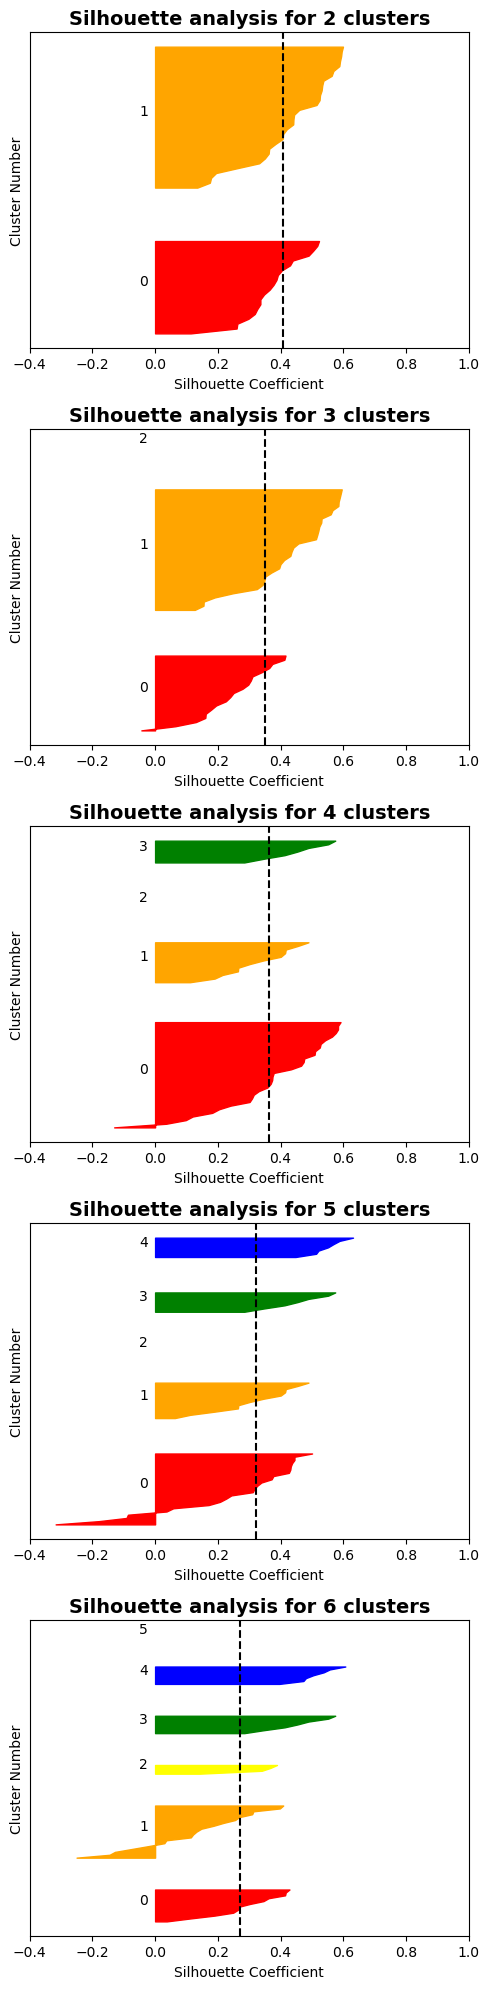

In [108]:
# Silhouette Analysis for average linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    cluster_labels = clusterer.fit_predict(std_df)
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

same as ward, average linkage performs well if there are 2 clusters. 

#### For complete linkage

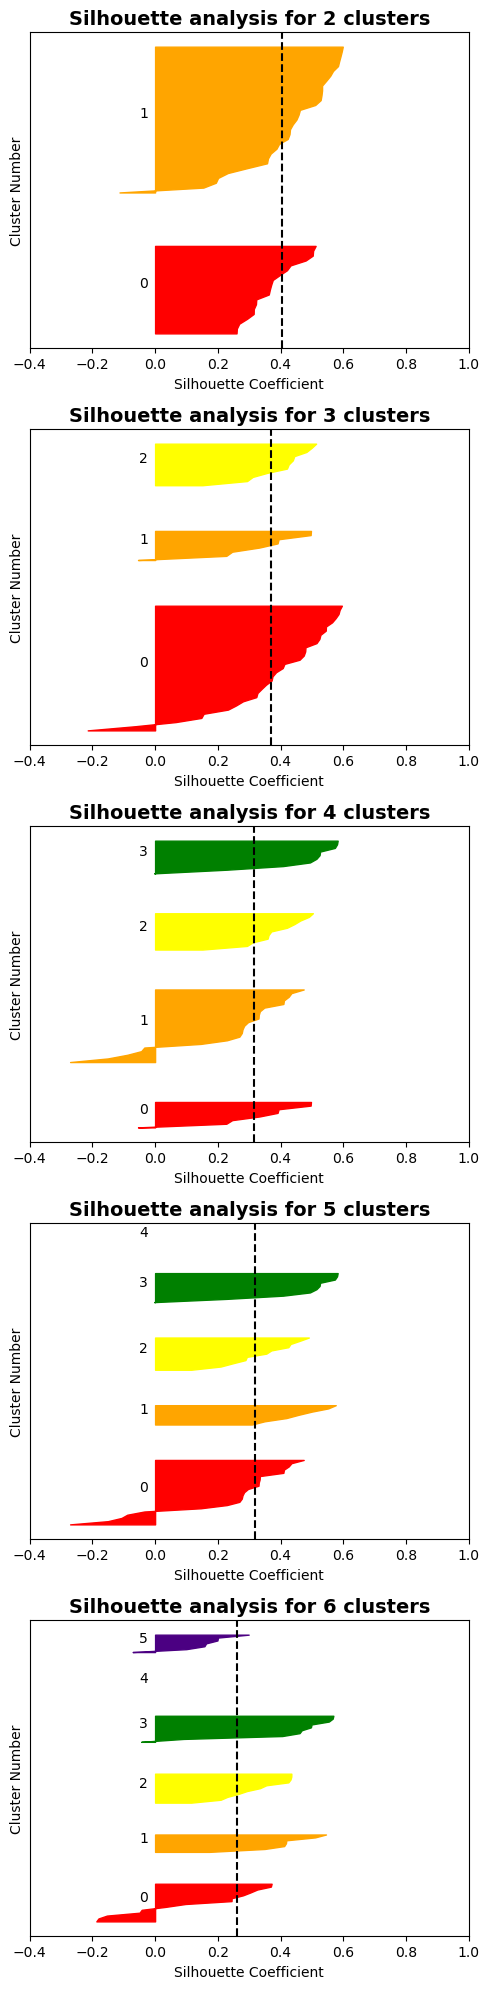

In [109]:
# Silhouette Analysis for complete linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'complete')
    cluster_labels = clusterer.fit_predict(std_df)
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

Complete linkage provides best clustering with 2 clusters as well.

In [111]:
# Getting silhouette scores for each linkage
for linkage in ['ward', 'single', 'average', 'complete']:
    agg = AgglomerativeClustering(n_clusters= 2, linkage= linkage)
    print(f"The average Silhouette Score for {linkage} linkage is {silhouette_score(std_df, agg.fit_predict(std_df))}")

The average Silhouette Score for ward linkage is 0.4047944502519567
The average Silhouette Score for single linkage is 0.23455598753159795
The average Silhouette Score for average linkage is 0.4084890326217641
The average Silhouette Score for complete linkage is 0.4047944502519567


We can see that average linkage has the best silhouette scores and we will use it

In [133]:
# getting the final hierarchical clusters and adding labels to a dataframe with our data
agg = AgglomerativeClustering(n_clusters=2, linkage = 'average')
clabel = pd.DataFrame(agg.fit_predict(std_df), columns = ['clabel'], index = df.index)
hierarchically_clustered = pd.concat([pd.DataFrame(std_df, columns = df.columns, index = df.index), clabel], axis = 1)
hierarchically_clustered['State'] = hierarchically_clustered.index
hierarchically_clustered.sort_values(['clabel','UrbanPop'], inplace=True)

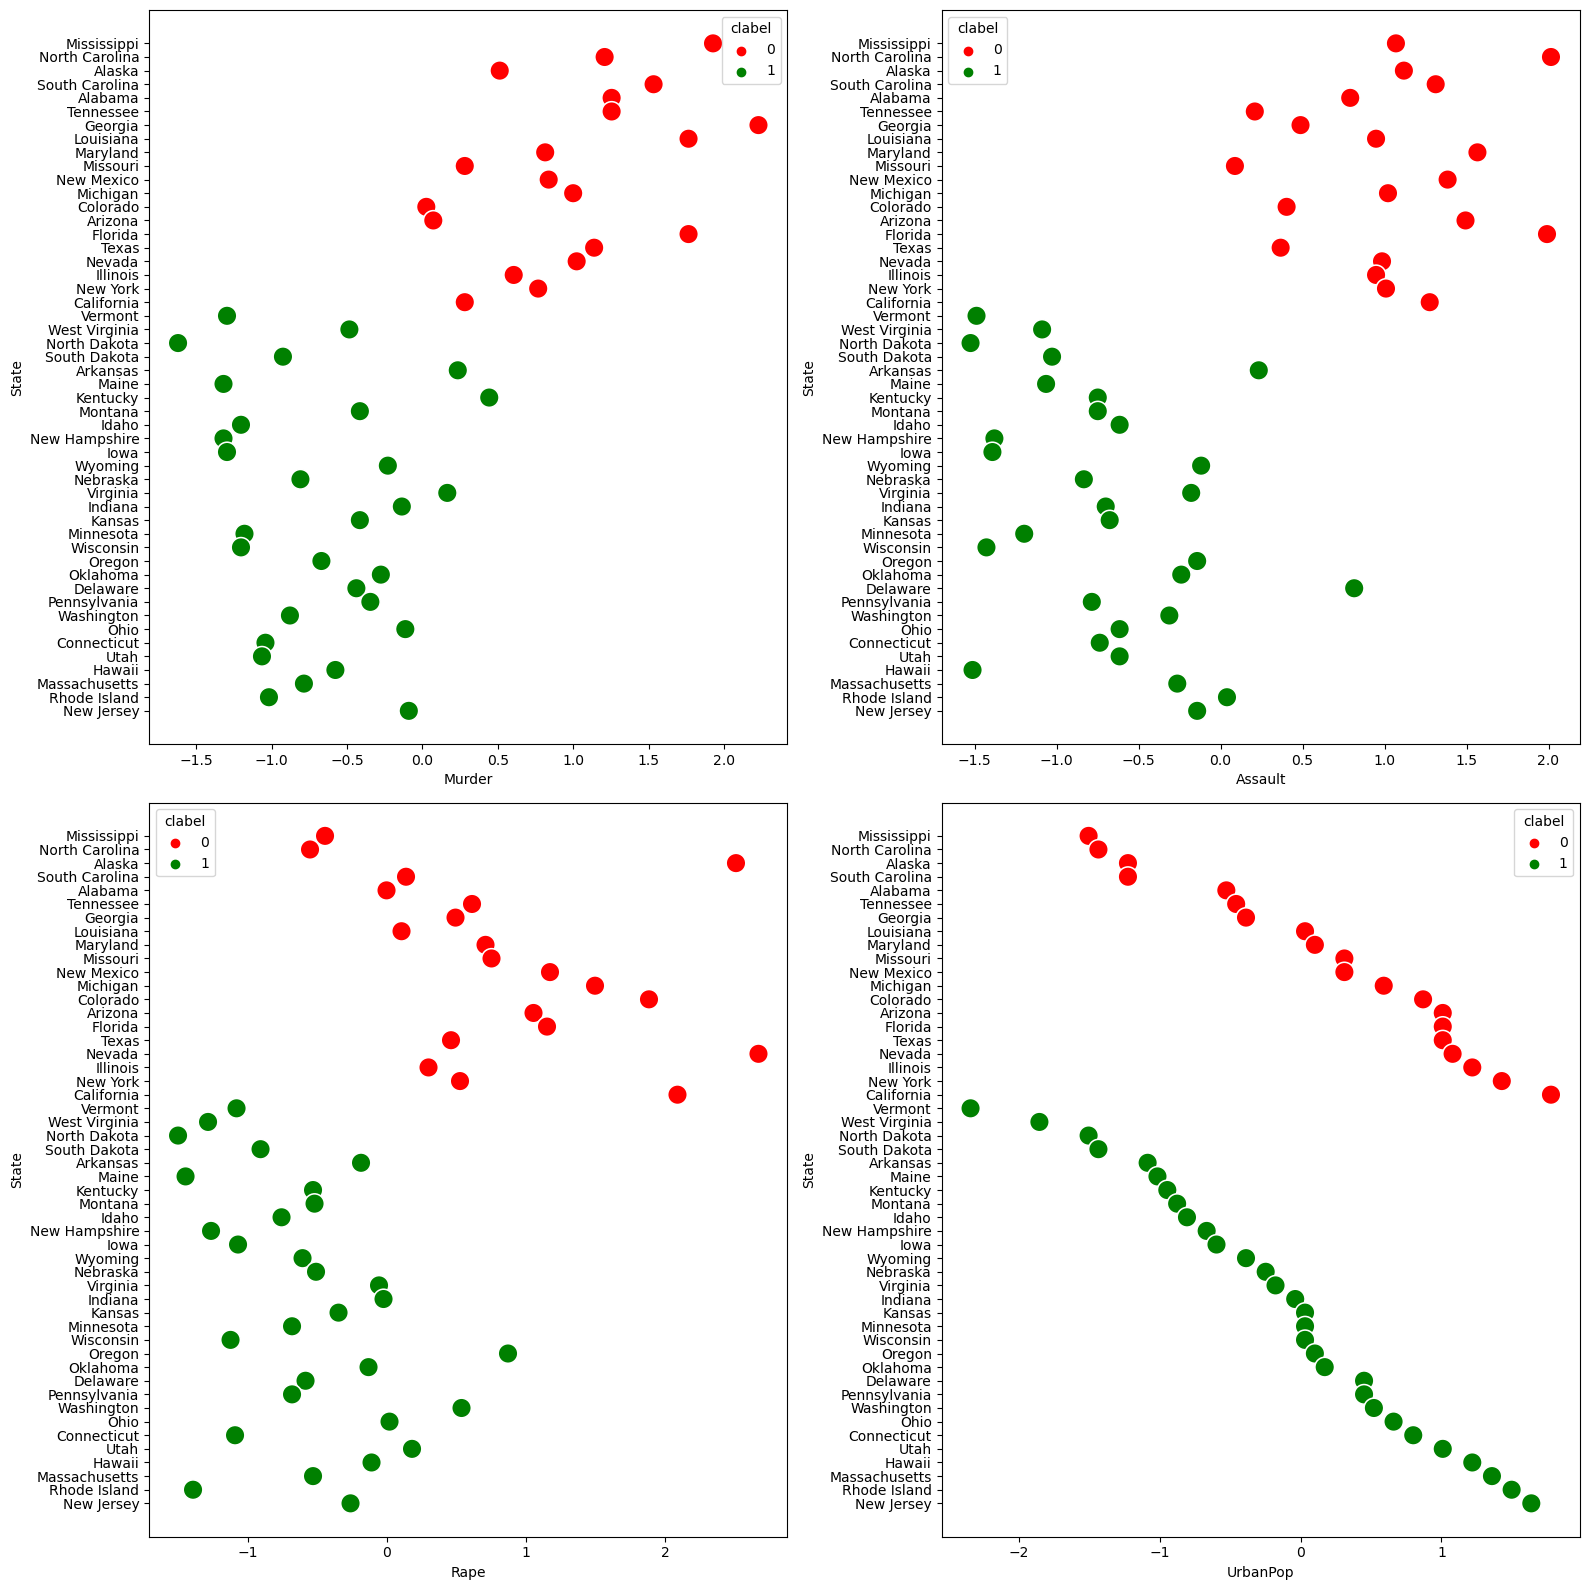

In [134]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))
sns.scatterplot(hierarchically_clustered, x = 'Murder', y = 'State', hue = 'clabel', ax= axes[0,0], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Assault', y = 'State', hue = 'clabel', ax= axes[0,1], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Rape', y = 'State', hue = 'clabel', ax= axes[1,0], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'UrbanPop', y = 'State', hue = 'clabel', ax= axes[1,1], palette=['red','green'], s = 200)
plt.tight_layout()
plt.show()

Here the Group 0 has higher crime rates than Group 1, and clustering is good as well

In [135]:
# Statistics for each group
hierarchically_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                                 Assault                      \
             min       max      mean    median       min       max      mean   
clabel                                                                         
0       0.025976  2.229265  1.015137  1.011658  0.087757  2.015028  1.024120   
1      -1.620693  0.443441 -0.676758 -0.727781 -1.524362  0.815030 -0.682747   

                  UrbanPop                                    Rape            \
          median       min       max      mean    median       min       max   
clabel                                                                         
0       1.015029 -1.503215  1.776781  0.199591  0.311251 -0.553480  2.671197   
1      -0.718302 -2.340661  1.637207 -0.133061 -0.002791 -1.502548  0.870123   

                            
            mean    median  
clabel                      
0       0.855564  0.659818  
1      -0.570376 -0.558872

### For Normalized data

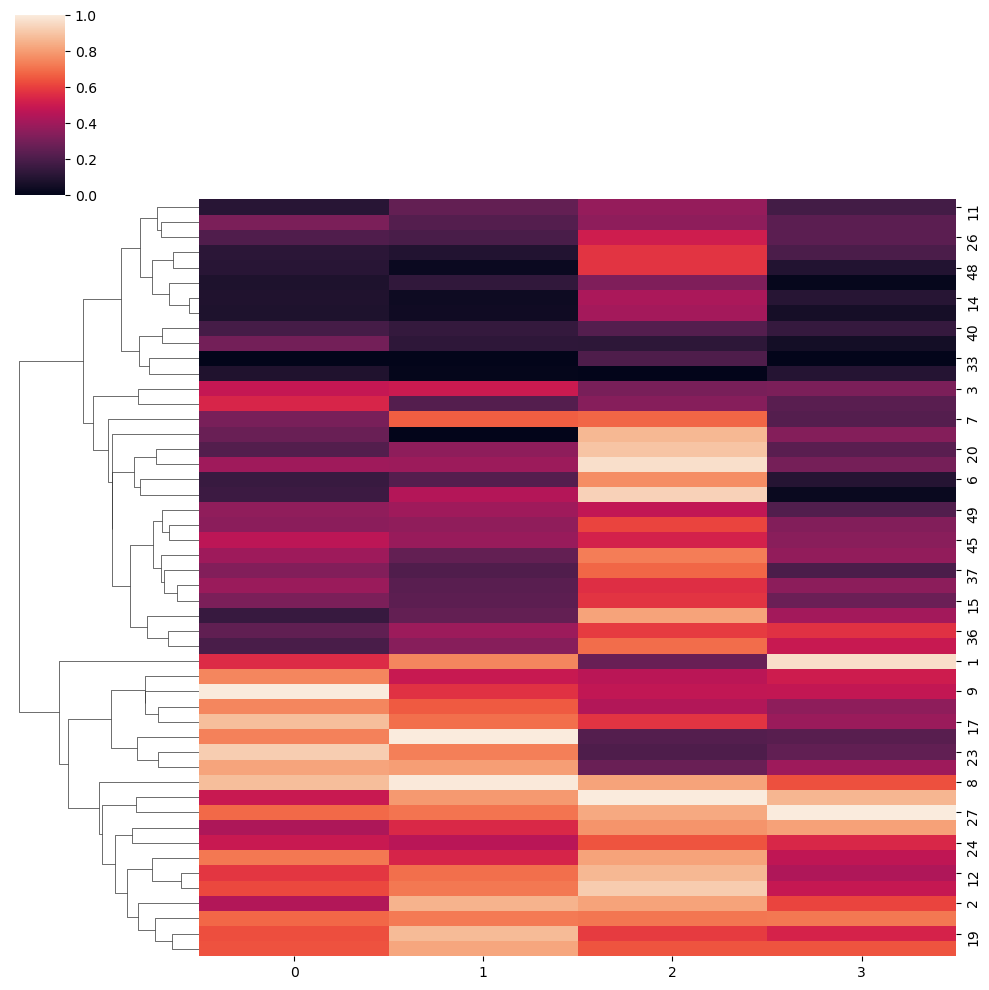

In [120]:
# To get a visual representation of the hierarchical clustering
sns.clustermap(norm_df, standard_scale= True, col_cluster = False)

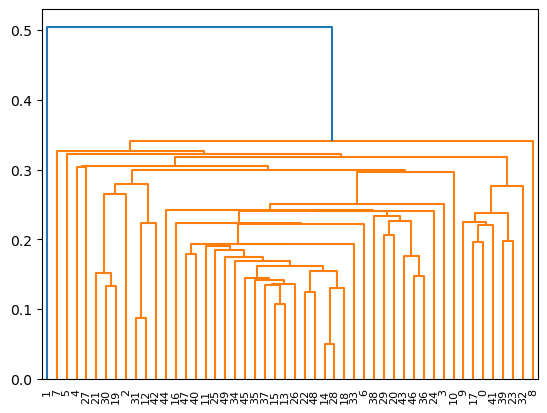

In [122]:
# Another visual representation of hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
dgram = dendrogram(linkage(norm_df, optimal_ordering=True))

#### For Ward linkage

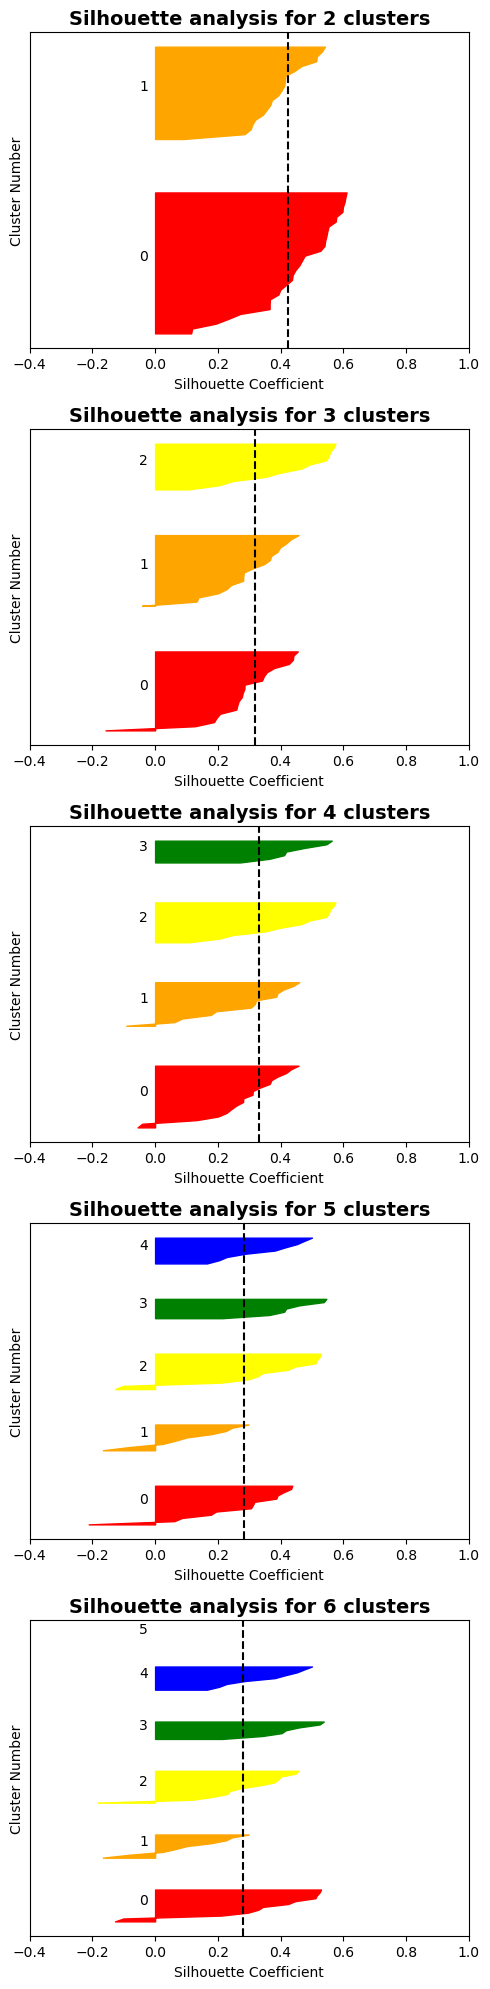

In [123]:
# Code for plotting silhouette coefficients for different clusters sizes. 
# This helps us determine cluster sizes for which samples are evenly distributed for each label, 
# and samples which have negative silhouette values (meaning they are incorrectly clustered)

# plotting for cluster size 2 to 6
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
# creating subplots for each cluster size
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
# iterating for each cluster size and creating the plot
for i, n_clusters in enumerate(range_n_clusters):
    # applying hierarchical clustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    # getting labels for each sample
    cluster_labels = clusterer.fit_predict(norm_df)
    # getting average silhouette score
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    # getting silhouette score for each sample
    sample_silhouette_values = silhouette_samples(norm_df, cluster_labels)
    # creating a list of colors to be used for each cluster to differentiate them
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    # setting a gap of 10 from x axis
    y_lower = 10
    # iterating over each cluster and plotting its silhouette's
    for cl in range(n_clusters):
        # getting silhouette values for ith cluster
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        # sorting these values for better visualization
        clth_cluster_silhouette_values.sort()
        # getting size of the cluster
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        # creating upper bound on y axis for this cluster
        y_upper = y_lower + size_cluster_cl
        # for the defined y values of this cluster, fill color between 0 and the silhouette value of each sample
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        # writing the cluster label at the center of each cluster
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        # padding by 10 on y axis before starting to plot the next cluster
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    # We do not expect misclustering to be very high, so setting lowest bound on x axis as -0.4 so that all plots match up of the y axis
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

We can see that for 2 clusters, there is no misclustering, the average silhouette coefficient is high

#### For average linkage

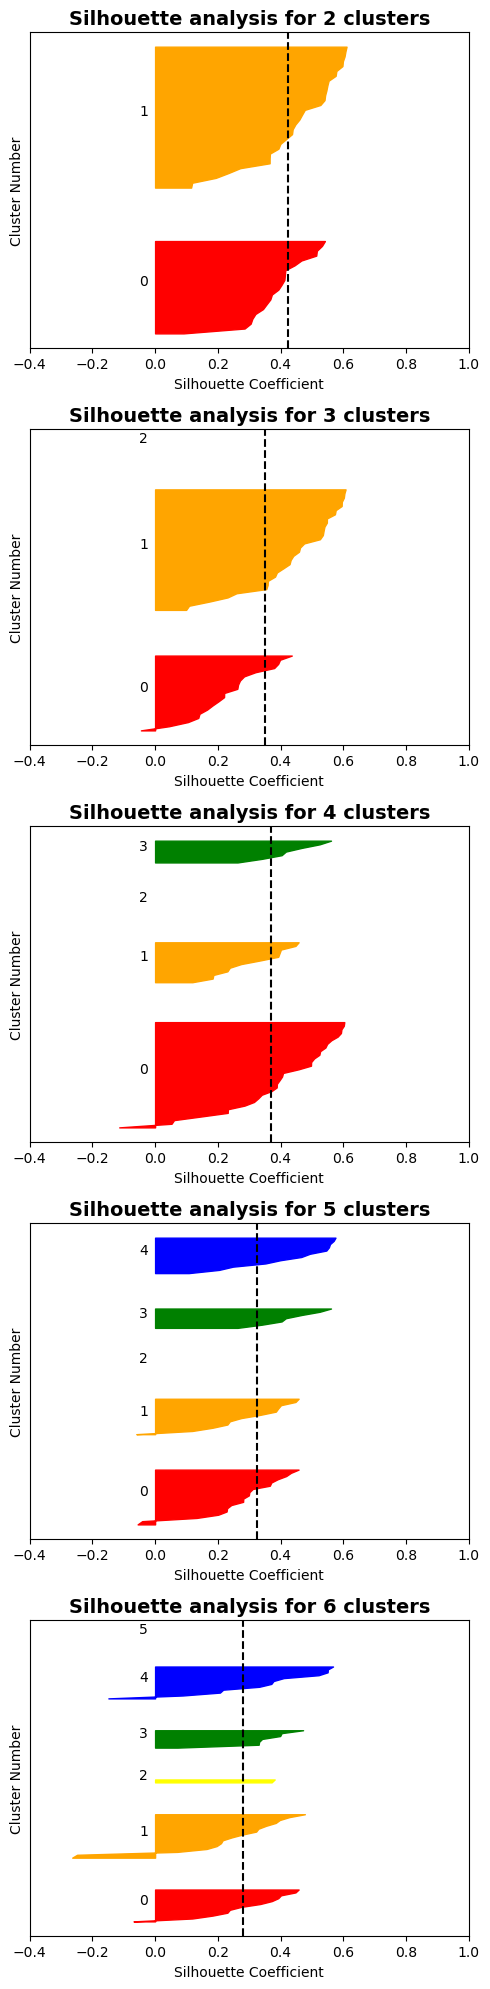

In [125]:
# Silhouette Analysis for average linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    cluster_labels = clusterer.fit_predict(norm_df)
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(norm_df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

same as ward, average linkage performs well if there are 2 clusters. 

#### For complete linkage

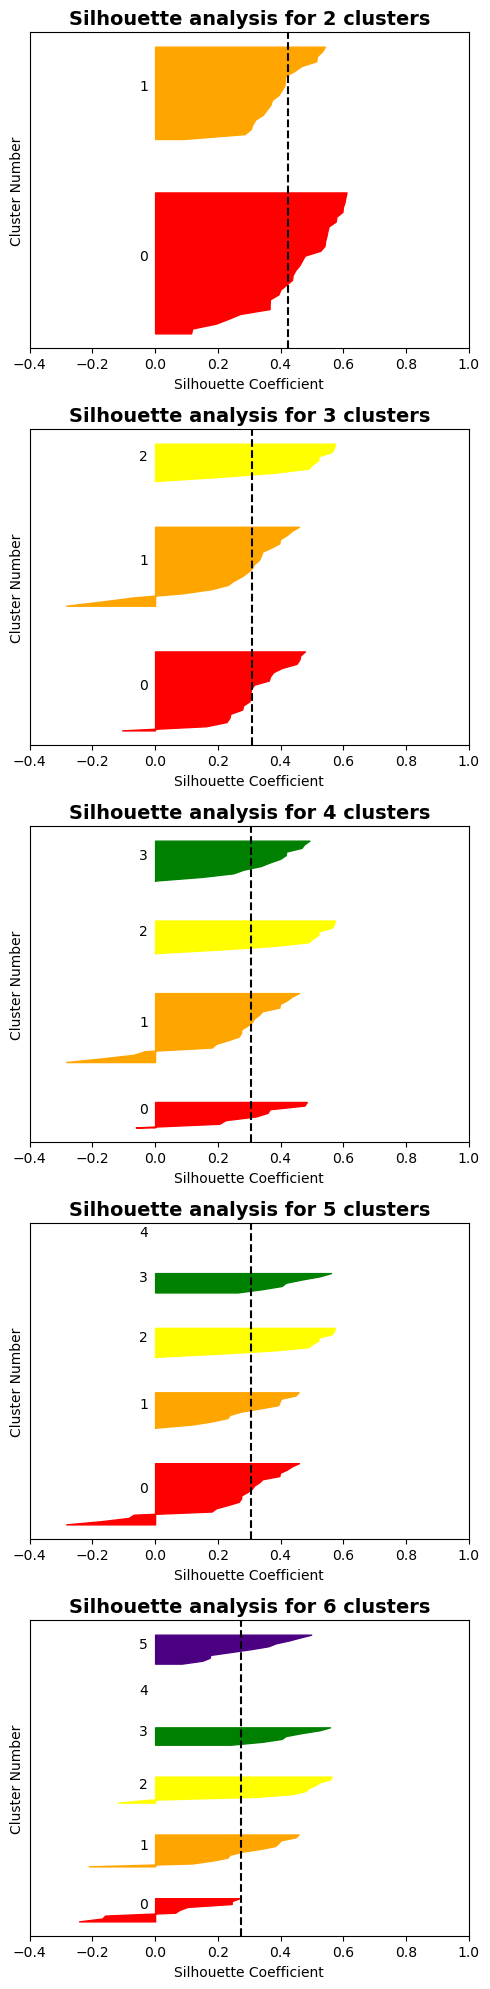

In [126]:
# Silhouette Analysis for complete linkage
range_n_clusters = [i for i in range(2,7)]
cluster_range_size = len(range_n_clusters)
fig, ax = plt.subplots(cluster_range_size, 1, figsize = (5,4*cluster_range_size))
for i, n_clusters in enumerate(range_n_clusters):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'complete')
    cluster_labels = clusterer.fit_predict(norm_df)
    silhouette_avg = silhouette_score(norm_df, cluster_labels)
    sample_silhouette_values = silhouette_samples(norm_df, cluster_labels)
    colors = ['red','orange','yellow','green','blue','indigo','violet']
    y_lower = 10
    for cl in range(n_clusters):
        clth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cl]
        clth_cluster_silhouette_values.sort()
        size_cluster_cl = clth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_cl
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),0,clth_cluster_silhouette_values,color=colors[cl])
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_cl, str(cl))
        y_lower = y_upper + 10
    ax[i].set_xlabel("Silhouette Coefficient")
    ax[i].set_ylabel("Cluster Number")
    ax[i].axvline(x=silhouette_avg, color="black", linestyle="--")
    ax[i].set_yticks([])
    ax[i].set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax[i].set_title(f"Silhouette analysis for {n_clusters} clusters",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

Complete linkage provides best clustering with 2 clusters as well.

In [128]:
# Getting silhouette scores for each linkage
for linkage in ['ward', 'single', 'average', 'complete']:
    agg = AgglomerativeClustering(n_clusters= 2, linkage= linkage)
    print(f"The average Silhouette Score for {linkage} linkage is {silhouette_score(norm_df, agg.fit_predict(norm_df))}")

The average Silhouette Score for ward linkage is 0.42364457559625074
The average Silhouette Score for single linkage is 0.21033337025958487
The average Silhouette Score for average linkage is 0.42364457559625074
The average Silhouette Score for complete linkage is 0.42364457559625074


We can see that silhouette scores are the same for ward, average, and complete linkages. Hence, our default linkage works as well as others, and we will select it

In [129]:
# getting the final hierarchical clusters and adding labels to a dataframe with our data
agg = AgglomerativeClustering(n_clusters=2)
clabel = pd.DataFrame(agg.fit_predict(norm_df), columns = ['clabel'], index = df.index)
hierarchically_clustered = pd.concat([pd.DataFrame(norm_df, columns = df.columns, index = df.index), clabel], axis = 1)
hierarchically_clustered['State'] = hierarchically_clustered.index
hierarchically_clustered.sort_values(['clabel','UrbanPop'], inplace=True)

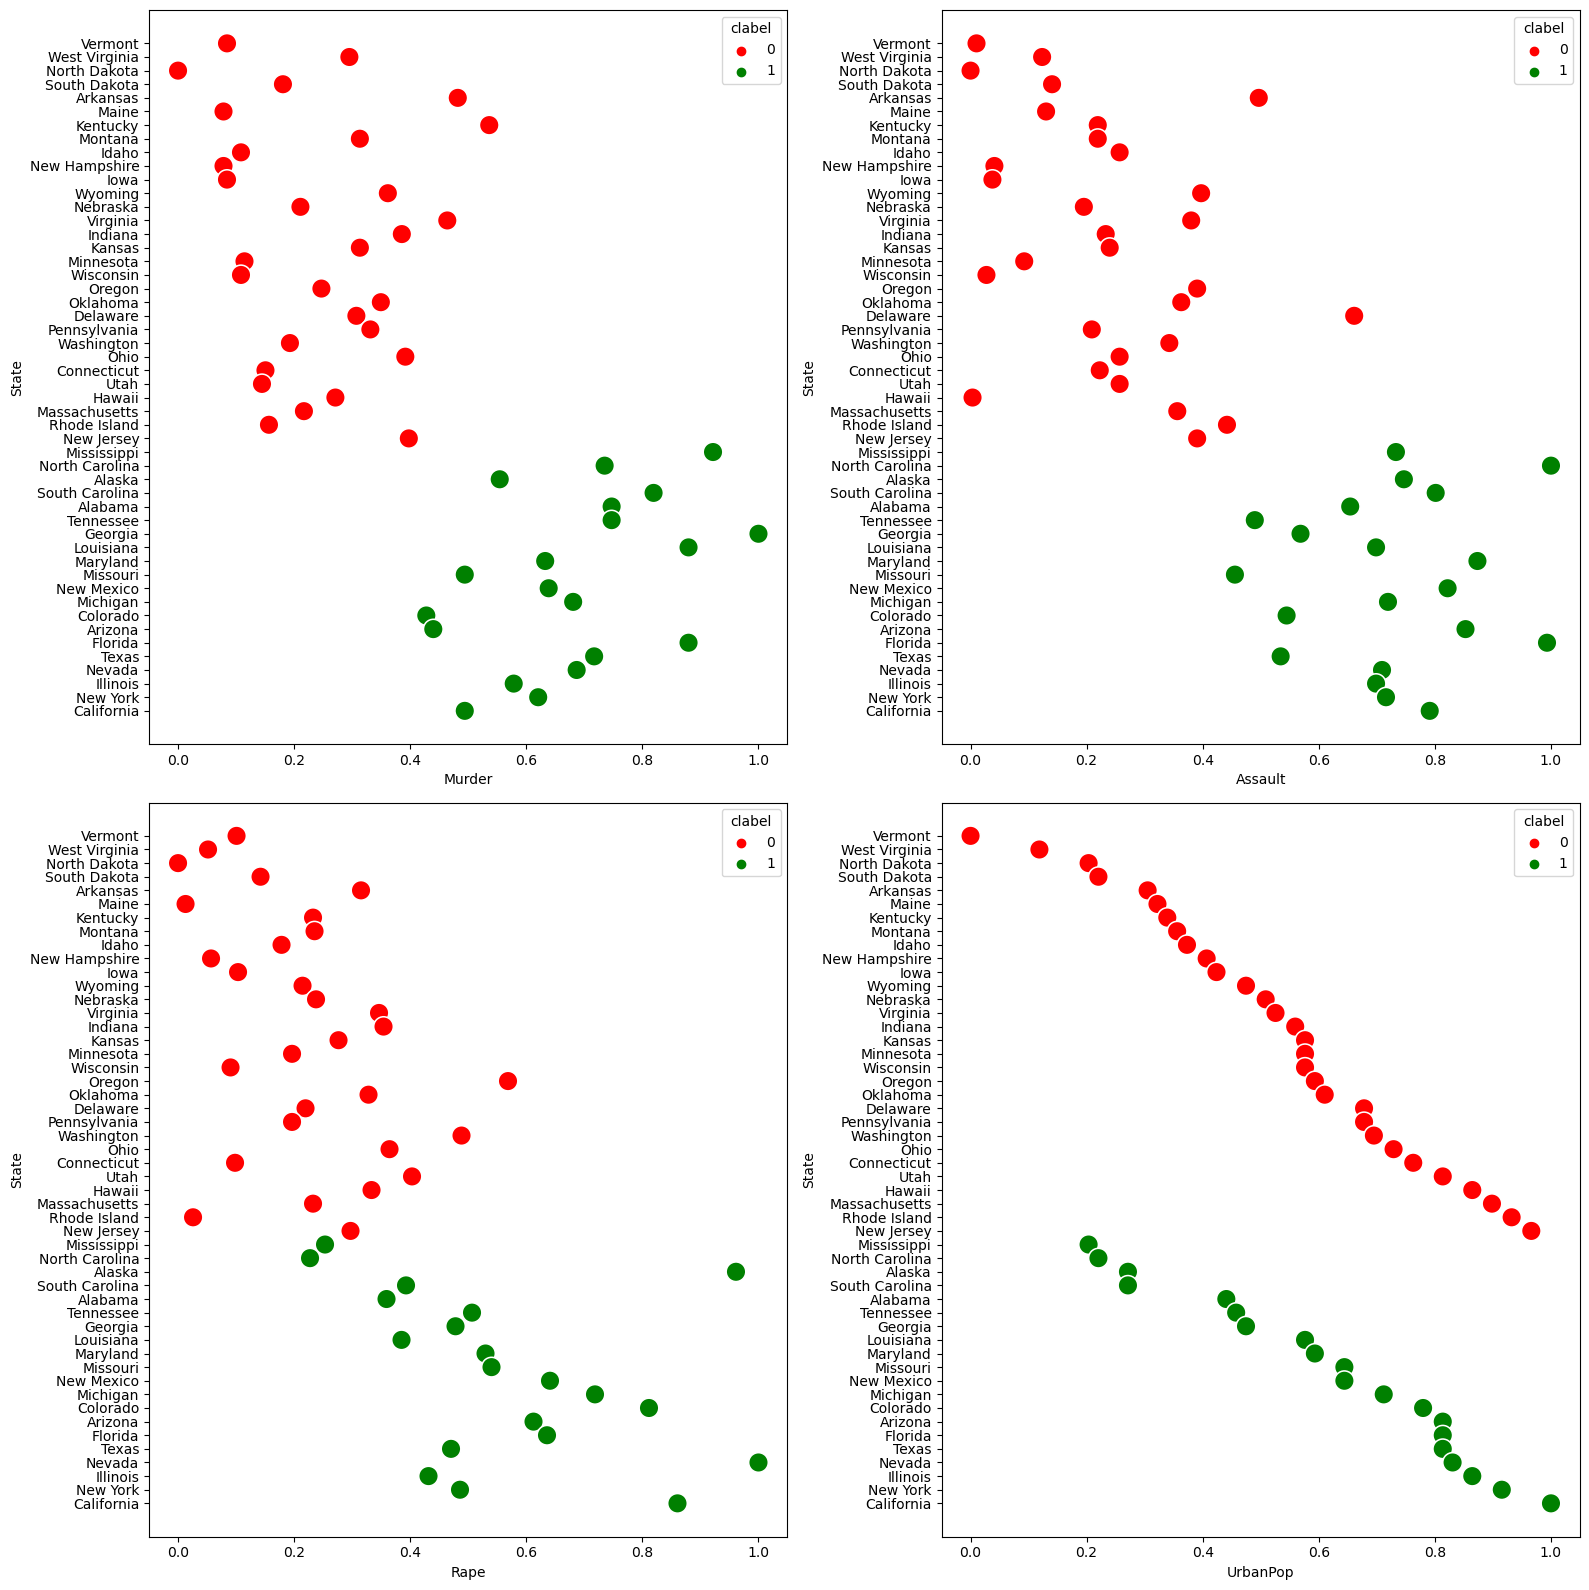

In [131]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))
sns.scatterplot(hierarchically_clustered, x = 'Murder', y = 'State', hue = 'clabel', ax= axes[0,0], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Assault', y = 'State', hue = 'clabel', ax= axes[0,1], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'Rape', y = 'State', hue = 'clabel', ax= axes[1,0], palette=['red','green'], s = 200)
sns.scatterplot(hierarchically_clustered, x = 'UrbanPop', y = 'State', hue = 'clabel', ax= axes[1,1], palette=['red','green'], s = 200)
plt.tight_layout()
plt.show()

This does a good job of clustering states with high crime rates

In [132]:
# Statistics for each group
hierarchically_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                                 Assault                      \
             min       max      mean    median       min       max      mean   
clabel                                                                         
0       0.000000  0.536145  0.245181  0.231928  0.000000  0.660959  0.237785   
1       0.427711  1.000000  0.684639  0.683735  0.455479  1.000000  0.720034   

                 UrbanPop                                   Rape            \
          median      min       max      mean    median      min       max   
clabel                                                                       
0       0.227740  0.00000  0.966102  0.536158  0.567797  0.00000  0.568475   
1       0.717466  0.20339  1.000000  0.616949  0.644068  0.22739  1.000000   

                            
            mean    median  
clabel                      
0       0.223342  0.226098  
1       0.564987  0.518088

### Raw Data gives the best Silhouette Score for 3 clusters

## K-Means

### For Raw Data

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

<Axes: >

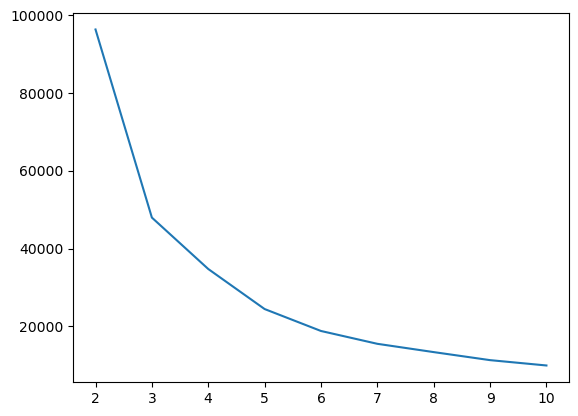

In [182]:
# Using Elbow method to determine optimal number of clusters
inertia = []
for i in range(2,11):
    kmc = KMeans(n_clusters=i)
    kmc.fit(df)
    inertia.append(kmc.inertia_)
sns.lineplot(y = inertia, x = range(2,11))

From the Elbow plot, it is clear that the optimal number of clusters is 3

In [183]:
# creating our model
kmc = KMeans(n_clusters=3)

In [184]:
# fitting and predicting cluster label for our data
clabel = pd.DataFrame(kmc.fit_predict(df), columns = ['clabel'], index = df.index)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [187]:
kmc.inertia_

47964.26535714285

In [211]:
silhouette_score(df, clabel)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2333659874278873

In [212]:
# adding cluster labels to our data
kmean_clustered = pd.concat([df, clabel], axis = 1)

In [213]:
kmean_clustered['State'] = kmean_clustered.index

In [214]:
kmean_clustered.sort_values(['clabel', 'UrbanPop'], inplace = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9624\1100807764.py:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(kmean_clustered, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[0,0])
C:\Users\harsh\AppData\Local\Temp\ipykernel_9624\1100807764.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(kmean_clustered, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[0,1])
C:\Users\harsh\AppData\Local\Temp\ipykernel_9624\1100807764.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(kmean_clustered, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[1,0])
C:\Users\harsh

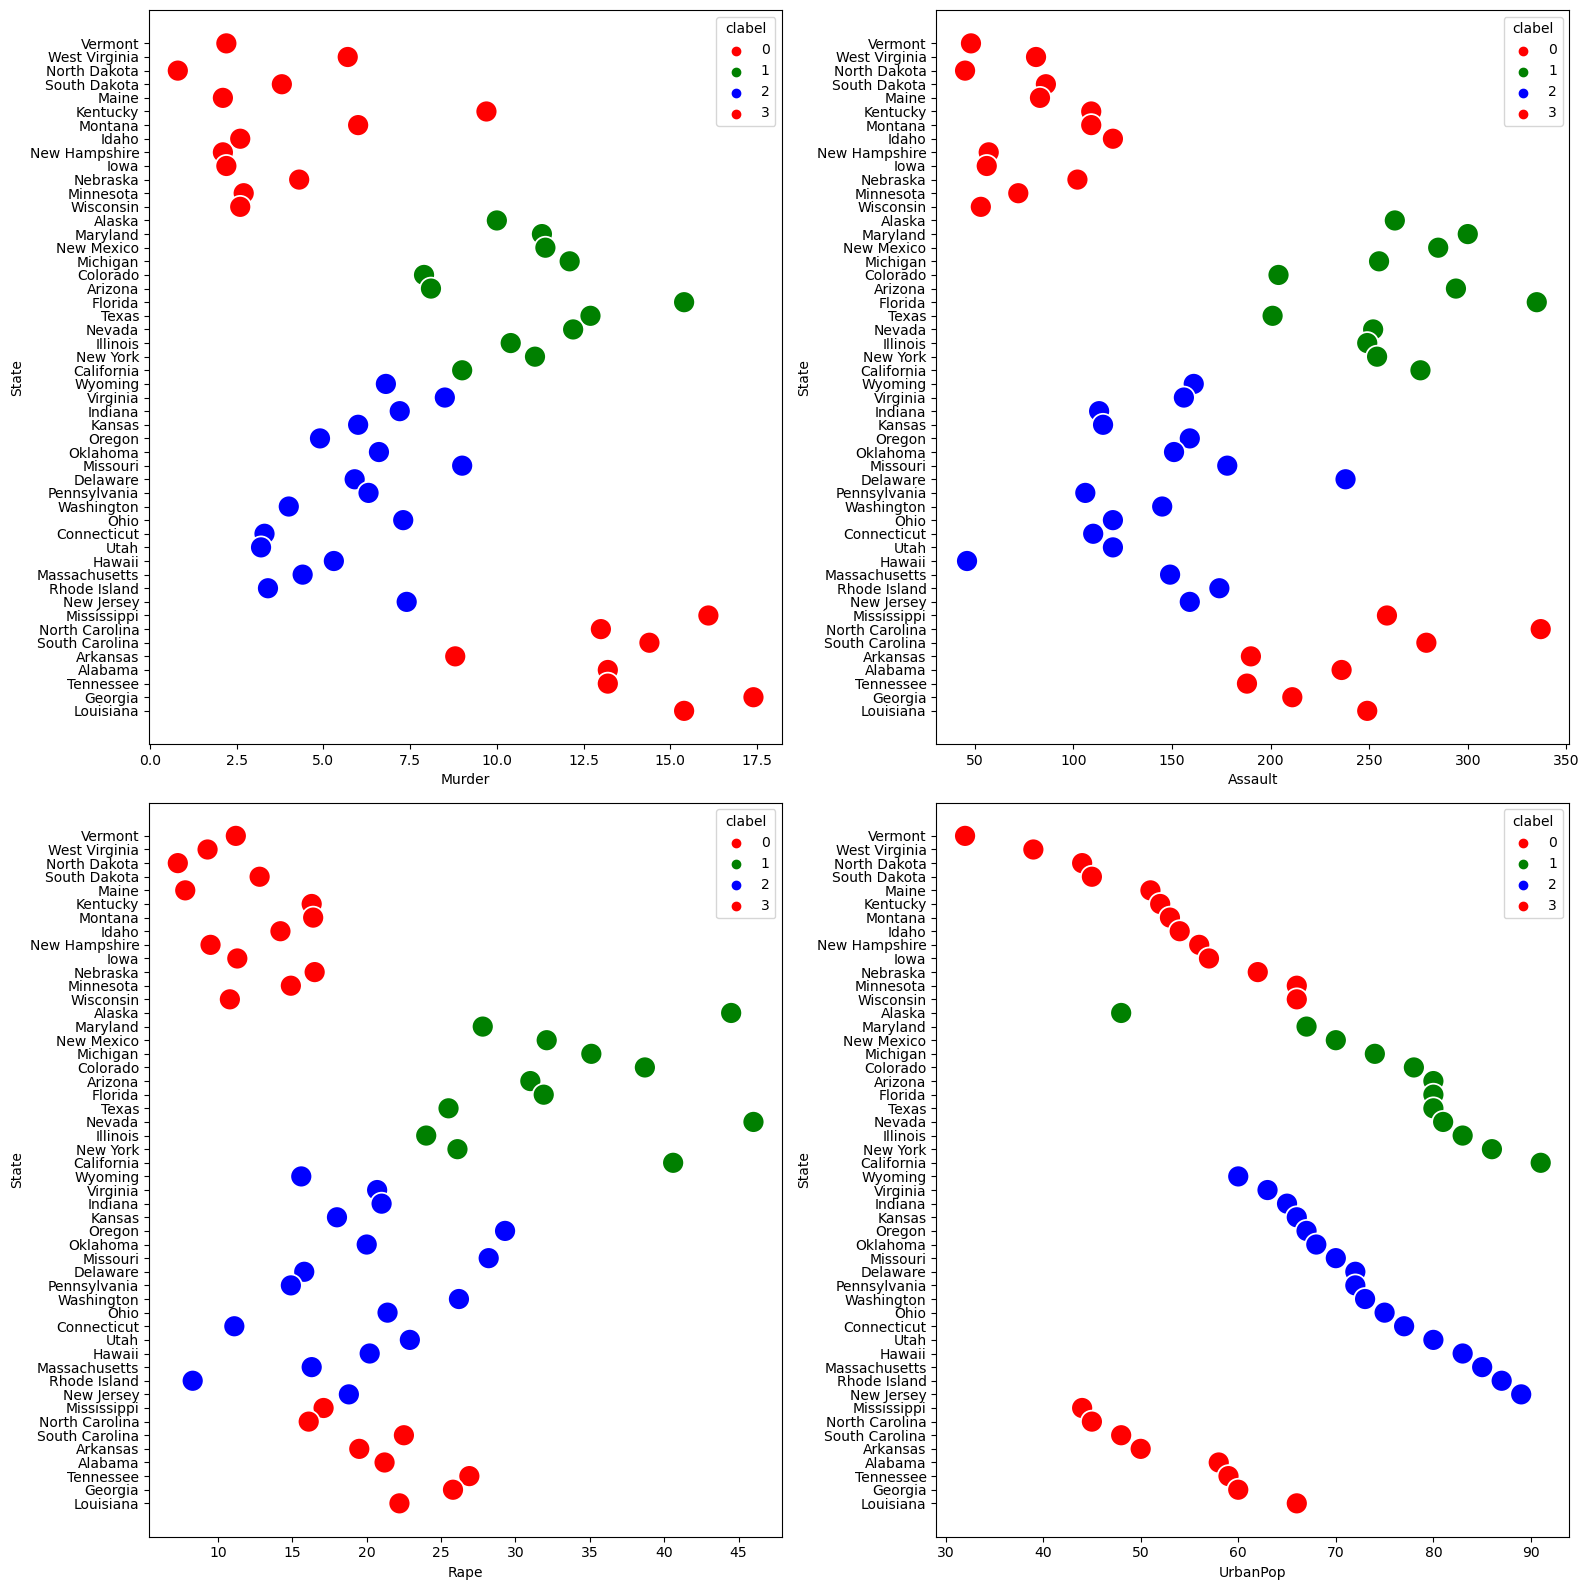

In [215]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
sns.scatterplot(kmean_clustered, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[0,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[0,1])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[1,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue'], ax=axes[1,1])
plt.tight_layout()

Clusters are very prominent in Assault. For other crimes, clusters are somewhat sparse. Clusters with crime in ascending order are Group 1, Group 2, Group 0.

In [216]:
# Statistics for each cluster
kmean_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                         Assault                          \
          min   max       mean median     min  max        mean median   
clabel                                                                  
0         0.8   9.7   3.600000    2.6      45  120   78.538462   81.0   
1         7.9  15.4  10.966667   11.2     201  335  264.000000  259.0   
2         3.2   9.0   5.852941    6.0      46  238  141.176471  149.0   
3         8.8  17.4  13.937500   13.8     188  337  243.625000  242.5   

       UrbanPop                        Rape                          
            min max       mean median   min   max       mean median  
clabel                                                               
0            32  66  52.076923   53.0   7.3  16.5  12.176923   11.3  
1            48  91  76.500000   80.0  24.0  46.0  33.608333   32.0  
2            60  89  73.647059   72.0   8.3  29.3  19.335294   20.0  
3            44  66  53.750000   54.0  16.1  26.9  21.412500   21.7

### For Standardized Data

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

<Axes: >

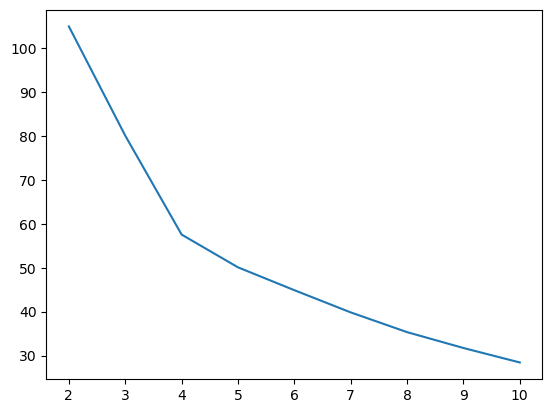

In [217]:
# Using Elbow method to determine optimal number of clusters
inertia = []
for i in range(2,11):
    kmc = KMeans(n_clusters=i)
    kmc.fit(std_df)
    inertia.append(kmc.inertia_)
sns.lineplot(y = inertia, x = range(2,11))

From the Elbow plot, it is clear that the optimal number of clusters is 4

In [218]:
# creating our model
kmc = KMeans(n_clusters=4)

In [219]:
# fitting and predicting cluster label for our data
clabel = pd.DataFrame(kmc.fit_predict(std_df), columns = ['clabel'], index = df.index)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [220]:
kmc.inertia_

57.55425863091104

In [221]:
silhouette_score(std_df, clabel)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33968891433344395

In [198]:
# adding cluster labels to our data
kmean_clustered = pd.concat([pd.DataFrame(std_df, columns = df.columns, index = df.index), clabel], axis = 1)

In [199]:
kmean_clustered['State'] = kmean_clustered.index

In [200]:
kmean_clustered.sort_values(['clabel', 'UrbanPop'], inplace = True)

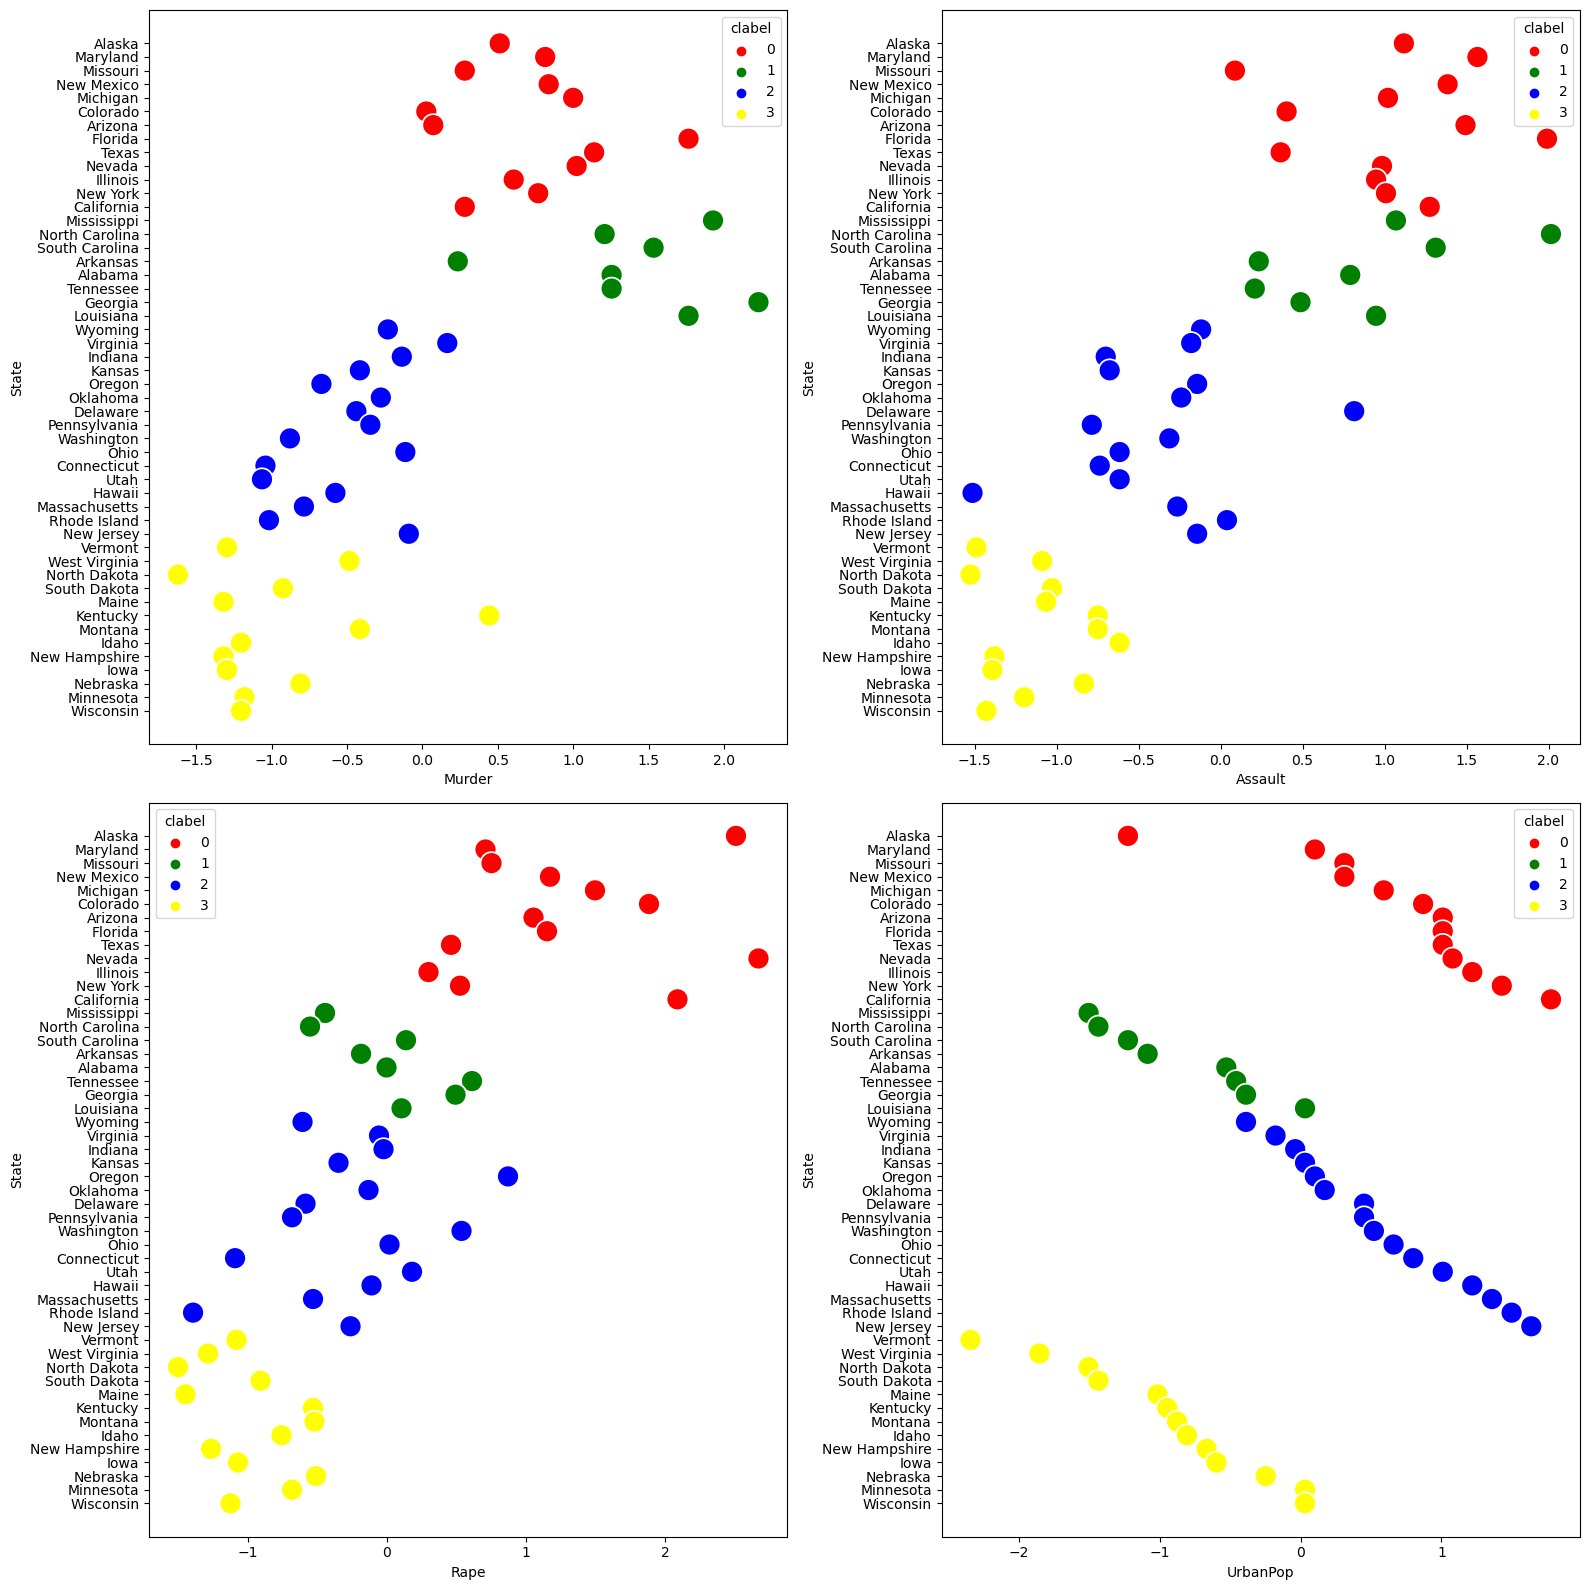

In [201]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
sns.scatterplot(kmean_clustered, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[0,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[0,1])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[1,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[1,1])
plt.tight_layout()

Data seems to be clustered by crime. Group 0 has the lowest crime, Group 3 higher than that, and Group 1 and 2 yet higher. However, Group 1 has lower rate for rape, and higher rate for murder than Group 2. Assault rates for Group 1 and 2 are about the same for both.

In [202]:
# Statistics for each cluster
kmean_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                                 Assault                      \
             min       max      mean    median       min       max      mean   
clabel                                                                         
0       0.025976  1.765415  0.702127  0.768136  0.087757  1.990786  1.049994   
1       0.234708  2.229265  1.426224  1.394334  0.208970  2.015028  0.883211   
2      -1.064073  0.165131 -0.494407 -0.426279 -1.512241  0.815030 -0.386484   
3      -1.620693  0.443441 -0.971303 -1.203228 -1.524362 -0.615272 -1.117836   

                  UrbanPop                                    Rape            \
          median       min       max      mean    median       min       max   
clabel                                                                         
0       1.021090 -1.224067  1.776781  0.729974  1.009122  0.298525  2.671197   
1       0.869575 -1.503215  0.032102 -0.822791 -0.805344 -0.553480  0.611287   
2      -0.288000 -0.386621  1.637207  0.581676  0.485719 -1.394700  0.870123   
3      -1.087999 -2.340661  0.032102 -0.939550 -0.875131 -1.502548 -0.510340   

                            
            mean    median  
clabel                      
0       1.289904  1.150530  
1       0.019467  0.050473  
2      -0.264310 -0.197579  
3      -0.976578 -1.071153

### For Normalized Data

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

<Axes: >

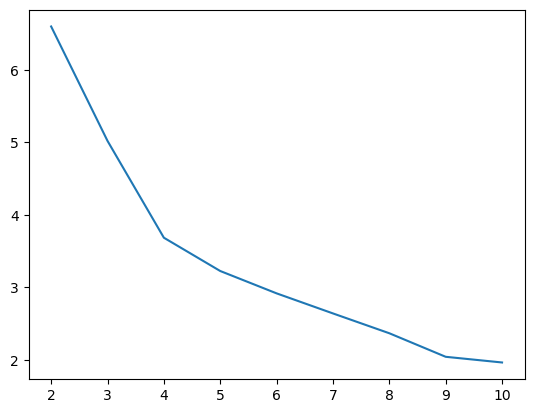

In [222]:
# Using Elbow method to determine optimal number of clusters
inertia = []
for i in range(2,11):
    kmc = KMeans(n_clusters=i)
    kmc.fit(norm_df)
    inertia.append(kmc.inertia_)
sns.lineplot(y = inertia, x = range(2,11))

From the Elbow plot, it is clear that the optimal number of clusters is 4

In [223]:
# creating our model
kmc = KMeans(n_clusters=4)

In [224]:
# fitting and predicting cluster label for our data
clabel = pd.DataFrame(kmc.fit_predict(norm_df), columns = ['clabel'], index = df.index)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [225]:
kmc.inertia_

3.6908204103921114

In [226]:
silhouette_score(norm_df, clabel)

C:\Users\harsh\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3349095719865253

In [177]:
# adding cluster labels to our data
kmean_clustered = pd.concat([pd.DataFrame(norm_df, columns = df.columns, index=df.index), clabel], axis = 1)

In [178]:
kmean_clustered['State'] = kmean_clustered.index

In [179]:
kmean_clustered.sort_values(['clabel', 'UrbanPop'], inplace = True)

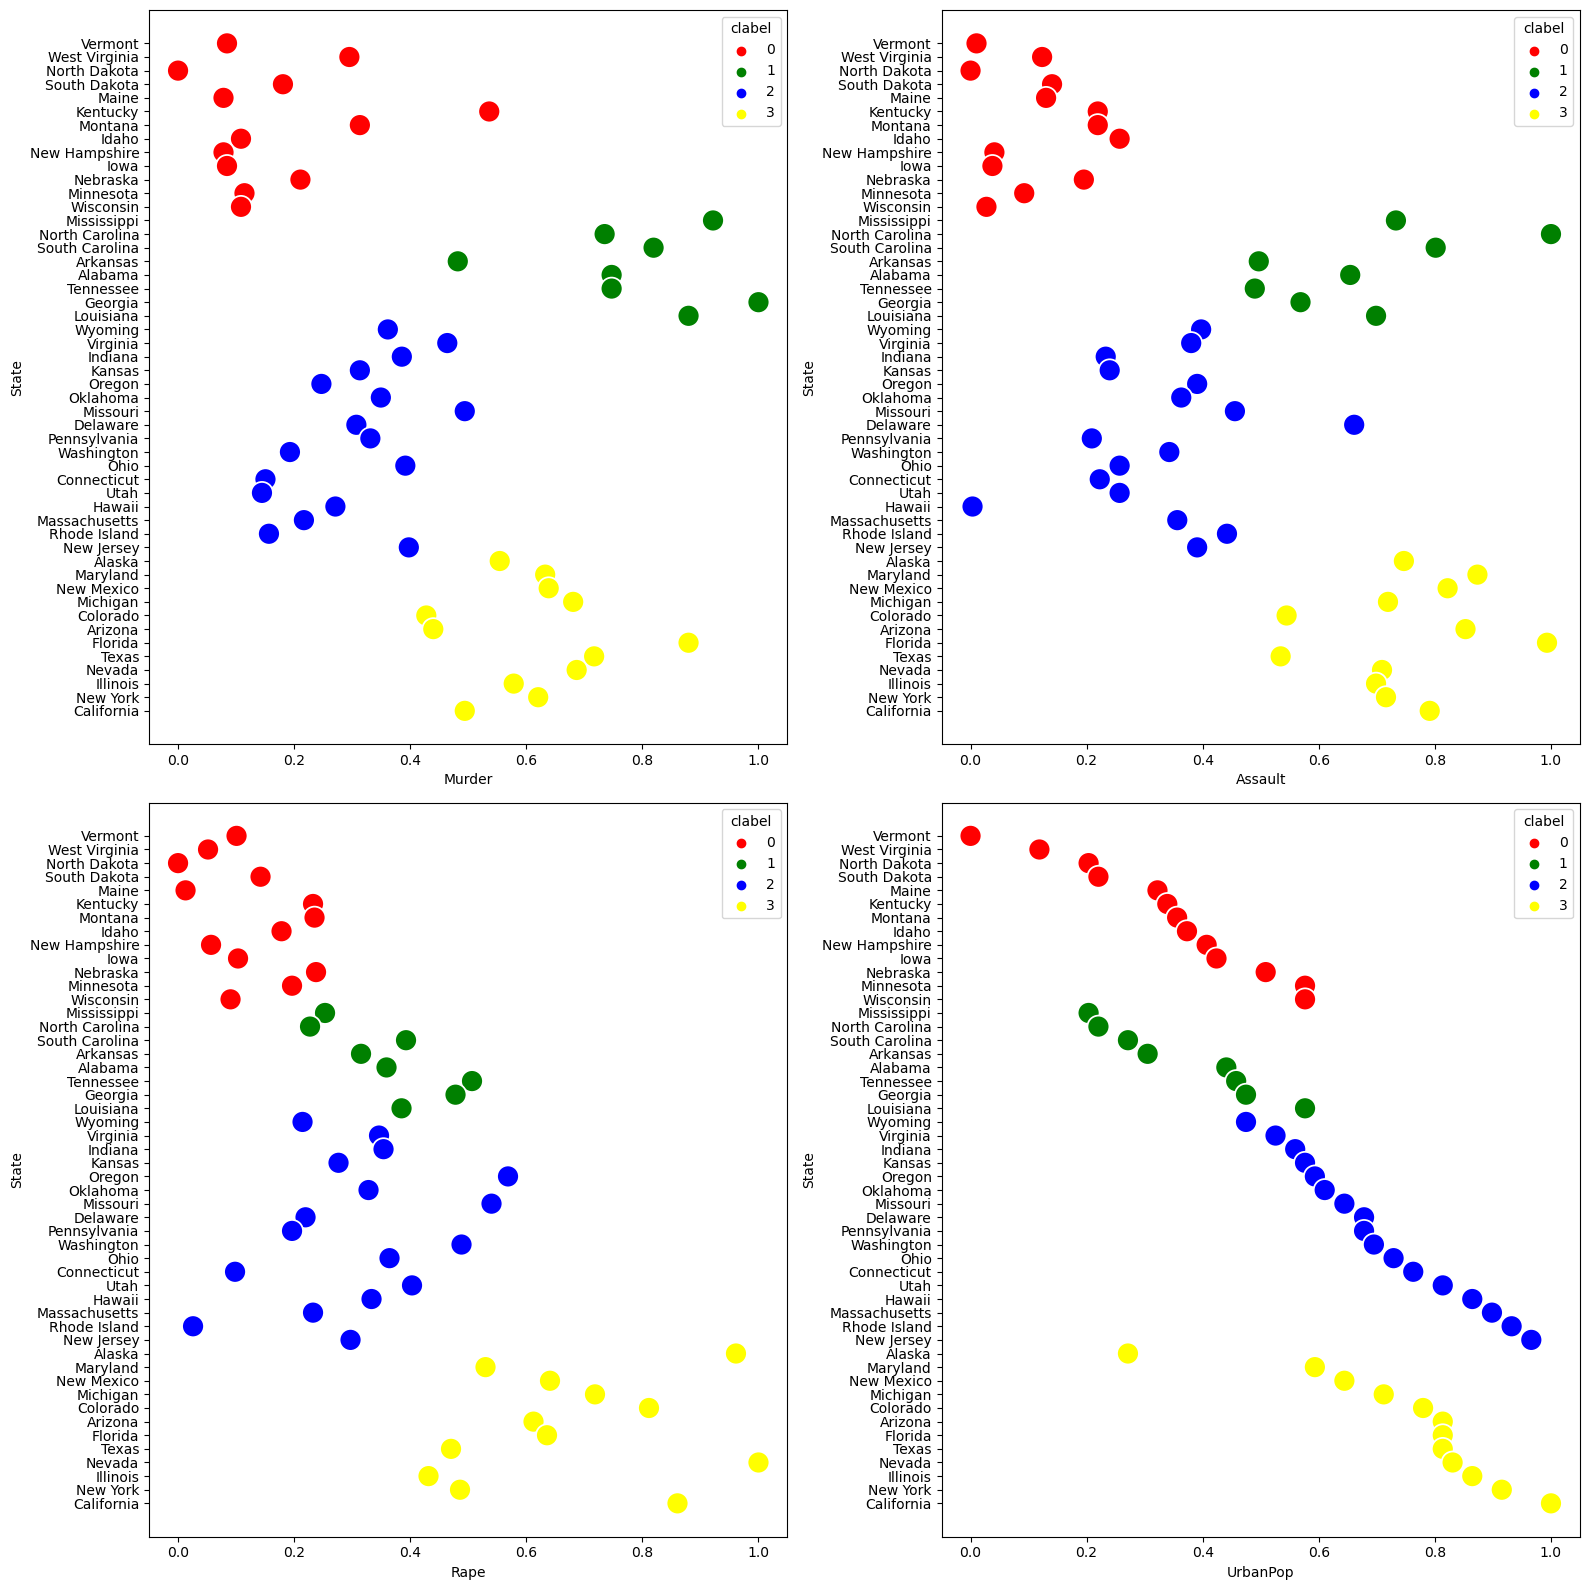

In [180]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
sns.scatterplot(kmean_clustered, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[0,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[0,1])
sns.scatterplot(kmean_clustered, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[1,0])
sns.scatterplot(kmean_clustered, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette= ['red', 'green', 'blue', 'yellow'], ax=axes[1,1])
plt.tight_layout()

Data seems to be clustered by crime. Group 0 has the lowest crime, Group 2 higher than that, and Group 3 yet higher. However, Group 1 has second lowest rate for rape, but highest for other crime types.

In [181]:
# Statistics for each cluster
kmean_clustered.drop(columns = ['State']).groupby('clabel').agg(['min','max','mean','median'])

Murder                                 Assault                      \
             min       max      mean    median       min       max      mean   
clabel                                                                         
0       0.000000  0.536145  0.168675  0.108434  0.000000  0.256849  0.114858   
1       0.481928  1.000000  0.791416  0.783133  0.489726  1.000000  0.680223   
2       0.144578  0.493976  0.304394  0.313253  0.003425  0.660959  0.329371   
3       0.427711  0.879518  0.612450  0.626506  0.534247  0.993151  0.750000   

                  UrbanPop                                    Rape            \
          median       min       max      mean    median       min       max   
clabel                                                                         
0       0.123288  0.000000  0.576271  0.340287  0.355932  0.000000  0.237726   
1       0.676370  0.203390  0.576271  0.368644  0.372881  0.227390  0.506460   
2       0.356164  0.474576  0.966102  0.705882  0.677966  0.025840  0.568475   
3       0.732877  0.271186  1.000000  0.754237  0.813559  0.431525  1.000000   

                            
            mean    median  
clabel                      
0       0.126019  0.103359  
1       0.364664  0.372093  
2       0.310990  0.328165  
3       0.679802  0.638243

### As K-means minimized inertia, we can't use it as our metric to determine the best model, as reducing inertia means reducing inter-cluster variances. As our data is normalized or standardized, the variances also reduce, which leads to lower inertia score. As per Silhouette Score, the standardized data has the best model

## DBSCAN

### For raw data

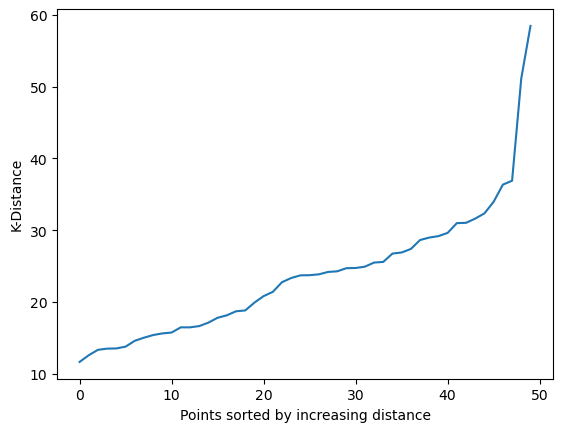

In [318]:
# Finding optimal value for eps using k distance graph

from sklearn.neighbors import NearestNeighbors

# Compute the k-distances
nbrs = NearestNeighbors().fit(df)
distances, indices = nbrs.kneighbors(df)
k_distances = distances[:, -1]
# Sort the k-distances in ascending order
k_distances_sorted = np.sort(k_distances)
# Plot the sorted k-distances
plt.plot(np.arange(len(df)), k_distances_sorted)      
plt.xlabel('Points sorted by increasing distance')
plt.ylabel('K-Distance')
plt.show()

We can see that optimal eps value lies between 30 and 40

In [319]:
# Define the parameter grid
param_grid = {
    'eps': np.arange(30, 39, 0.5),
    'min_samples': np.arange(4, 13)
}

# Perform grid search with silhouette score as the evaluation metric
best_score = -1
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)
        labels = dbscan.labels_
        score = silhouette_score(df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Print the best hyperparameters and silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)


Best eps: 35.5
Best min_samples: 8
Best silhouette score: 0.4908875677740093


In [320]:
# Getting clusters with optimal hyperparameters
dbc = DBSCAN(eps=35.5, min_samples=8)
dbc.fit(df)
clabel = pd.DataFrame(dbc.labels_, columns = ['clabel'], index = df.index)
dbscanned = pd.concat([df, clabel], axis = 1)

In [287]:
dbscanned['State'] = dbscanned.index

In [290]:
dbscanned.sort_values(['clabel','UrbanPop'], inplace = True)

In [321]:
silhouette_score(df, dbc.labels_)

0.4908875677740093

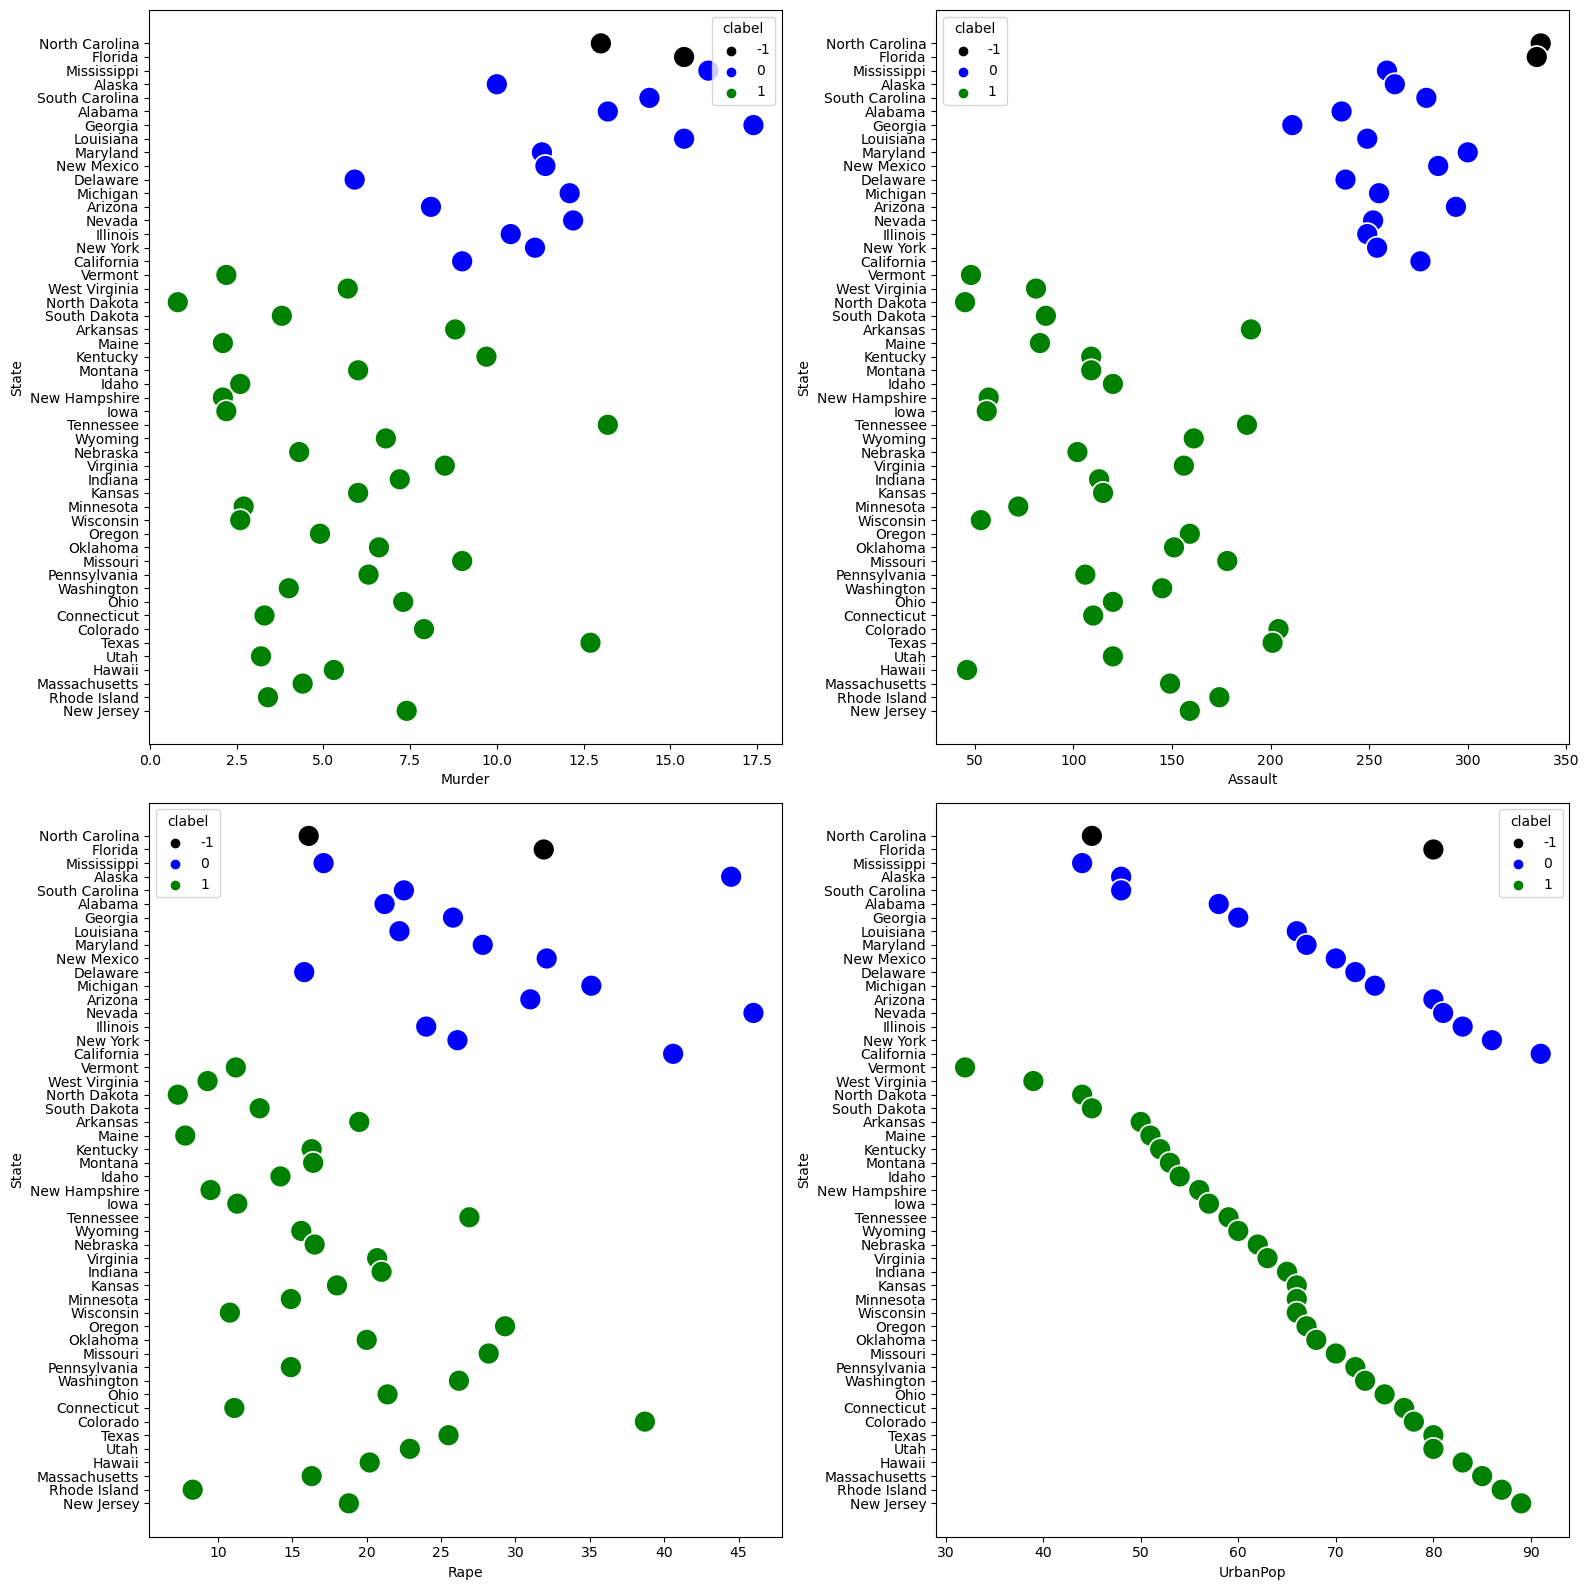

In [291]:
fig, axes = plt.subplots(2,2, figsize = (16,16))
sns.scatterplot(dbscanned, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette=['black', 'blue', 'green'], ax=axes[0,0])
sns.scatterplot(dbscanned, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette=['black', 'blue', 'green'], ax=axes[0,1])
sns.scatterplot(dbscanned, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette=['black', 'blue', 'green'], ax=axes[1,0])
sns.scatterplot(dbscanned, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette=['black', 'blue', 'green'], ax=axes[1,1])
plt.tight_layout()

Density clustering is clearly visible in Assault. Group 0 has higher rates of crime. The outliers has the highest Assault rate, but fall along with other groups in other crime rates

### For standardized data

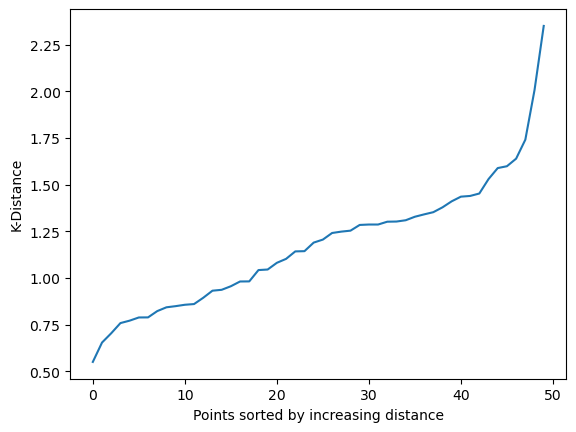

In [322]:
# Finding optimal value for eps using k distance graph
nbrs = NearestNeighbors().fit(std_df)
distances, indices = nbrs.kneighbors(std_df)
k_distances = distances[:, -1]
k_distances_sorted = np.sort(k_distances)
plt.plot(np.arange(len(std_df)), k_distances_sorted)      
plt.xlabel('Points sorted by increasing distance')
plt.ylabel('K-Distance')
plt.show()

We can see that optimal eps value lies between 1.25 and 1.75

In [323]:
# Define the parameter grid
param_grid = {
    'eps': np.arange(1.3, 1.75, 0.01),
    'min_samples': np.arange(4, 13)
}

# Perform grid search with silhouette score as the evaluation metric
best_score = -1
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(std_df)
        labels = dbscan.labels_
        score = silhouette_score(std_df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Print the best hyperparameters and silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)


Best eps: 1.3
Best min_samples: 10
Best silhouette score: 0.3785664955470221


In [324]:
# Getting clusters with optimal hyperparameters
dbc = DBSCAN(eps=1.3, min_samples=10)
dbc.fit(std_df)
clabel = pd.DataFrame(dbc.labels_, columns = ['clabel'], index = df.index)
dbscanned = pd.concat([pd.DataFrame(std_df, columns = df.columns, index = df.index), clabel], axis = 1)
dbscanned['State'] = dbscanned.index
dbscanned.sort_values(['clabel','UrbanPop'], inplace = True)

In [325]:
silhouette_score(std_df, dbc.labels_)

0.3785664955470221

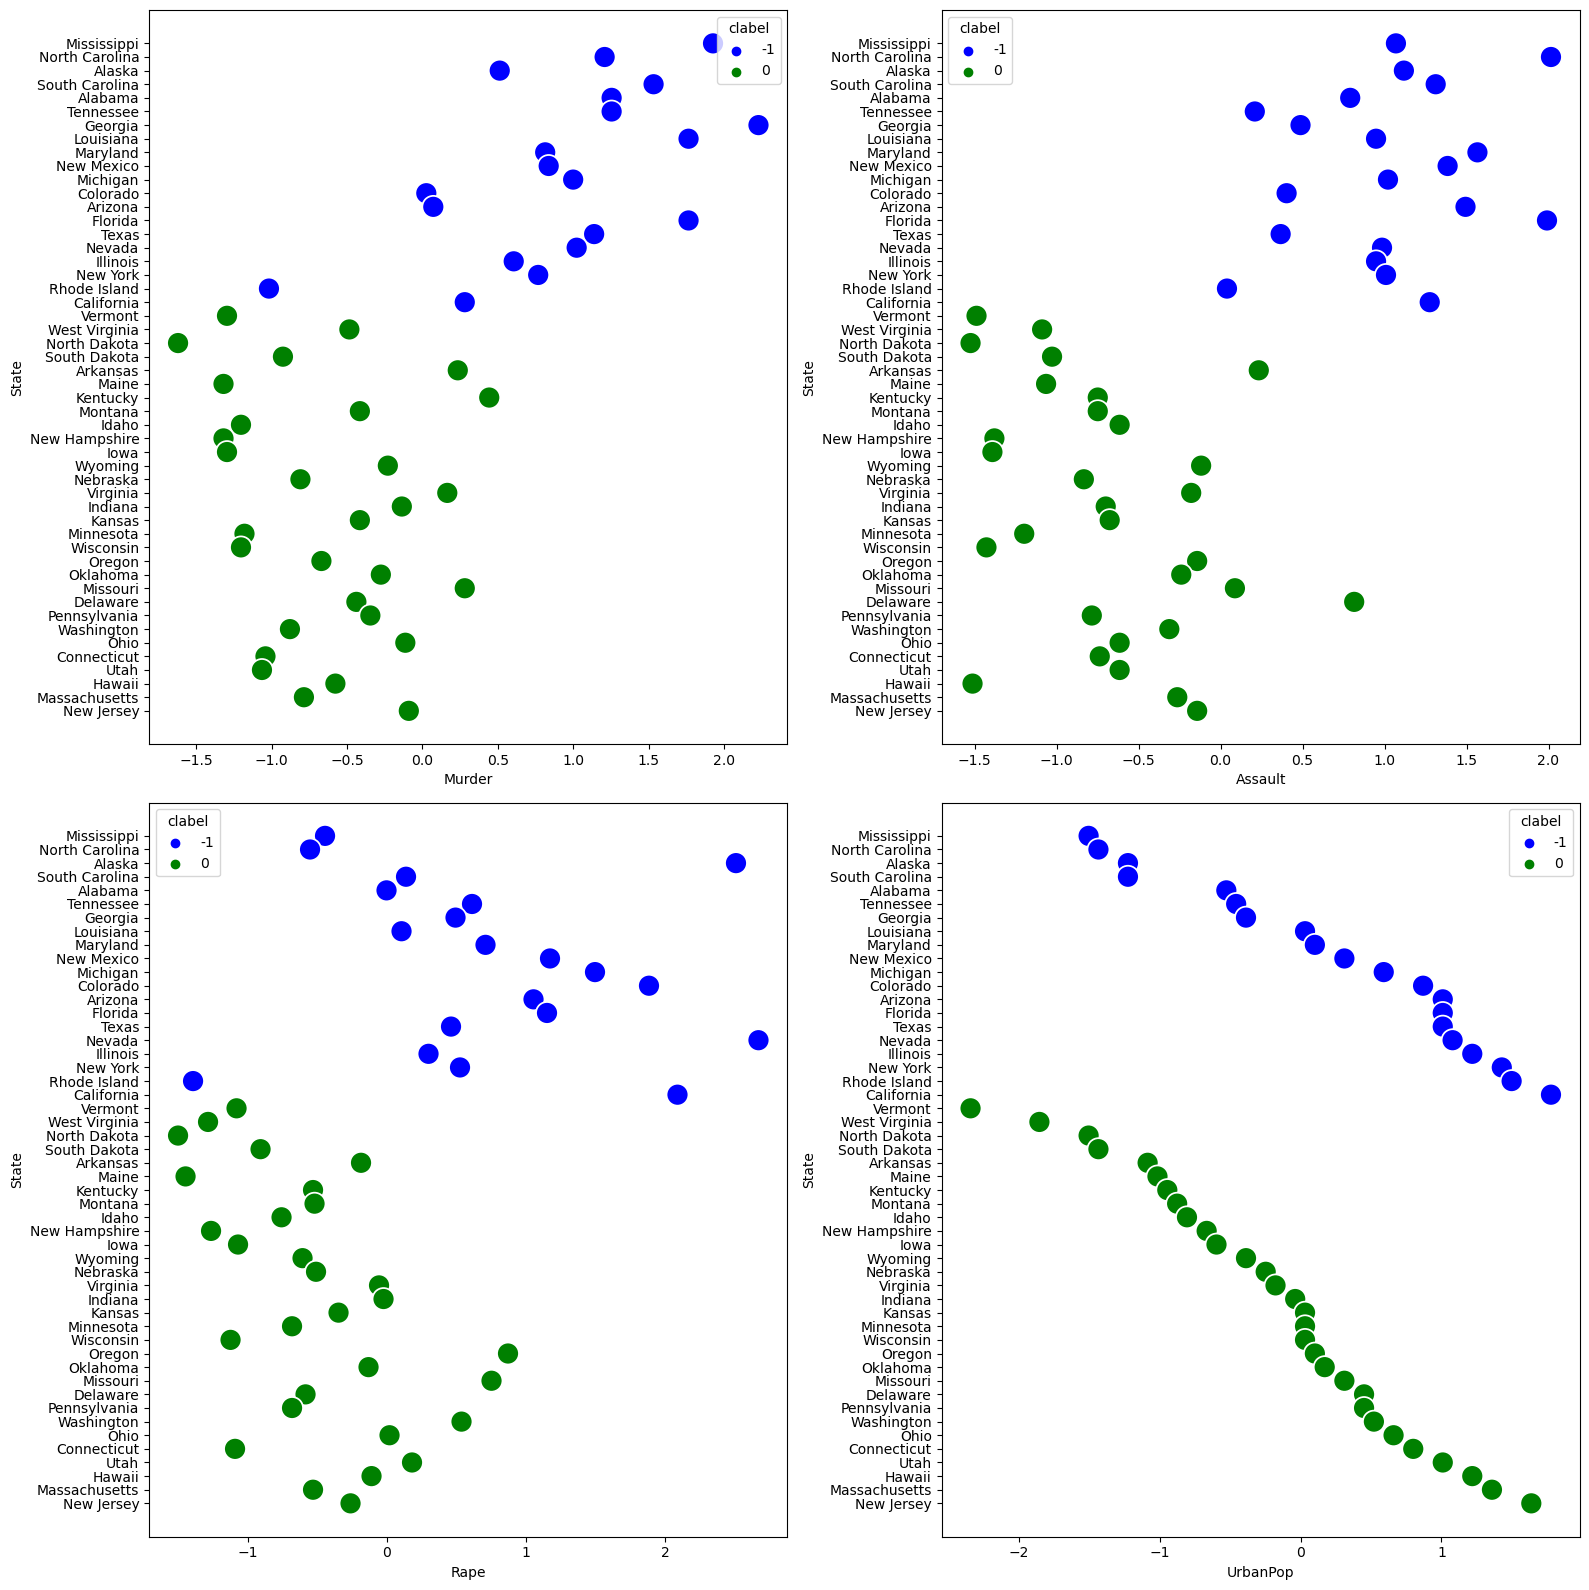

In [305]:
fig, axes = plt.subplots(2,2, figsize = (16,16))
sns.scatterplot(dbscanned, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[0,0])
sns.scatterplot(dbscanned, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[0,1])
sns.scatterplot(dbscanned, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[1,0])
sns.scatterplot(dbscanned, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[1,1])
plt.tight_layout()

Clusters have formed on the basis of high and low crime rates

### For Normalized data

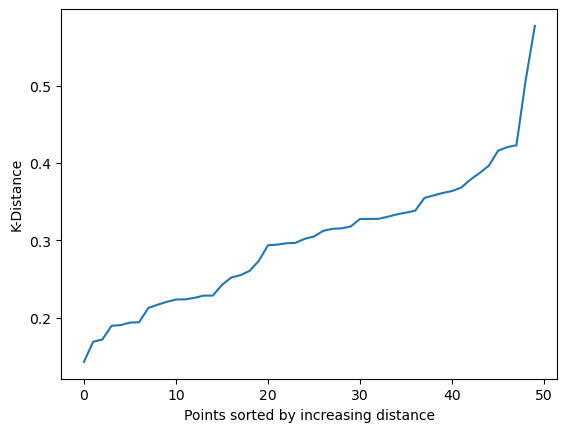

In [326]:
# Finding optimal value for eps using k distance graph
nbrs = NearestNeighbors().fit(norm_df)
distances, indices = nbrs.kneighbors(norm_df)
k_distances = distances[:, -1]
k_distances_sorted = np.sort(k_distances)
plt.plot(np.arange(len(norm_df)), k_distances_sorted)      
plt.xlabel('Points sorted by increasing distance')
plt.ylabel('K-Distance')
plt.show()

We can see that optimal eps value lies between 0.3 and 0.5

In [327]:
# Define the parameter grid
param_grid = {
    'eps': np.arange(0.3, 0.5, 0.01),
    'min_samples': np.arange(4, 13)
}

# Perform grid search with silhouette score as the evaluation metric
best_score = -1
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(norm_df)
        labels = dbscan.labels_
        score = silhouette_score(norm_df, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Print the best hyperparameters and silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)


Best eps: 0.32
Best min_samples: 8
Best silhouette score: 0.41082367366364203


In [328]:
# Getting clusters with optimal hyperparameters
dbc = DBSCAN(eps=0.32, min_samples=8)
dbc.fit(norm_df)
clabel = pd.DataFrame(dbc.labels_, columns = ['clabel'], index = df.index)
dbscanned = pd.concat([pd.DataFrame(norm_df, columns = df.columns, index = df.index), clabel], axis = 1)
dbscanned['State'] = dbscanned.index
dbscanned.sort_values(['clabel','UrbanPop'], inplace = True)

In [329]:
silhouette_score(norm_df, dbc.labels_)

0.41082367366364203

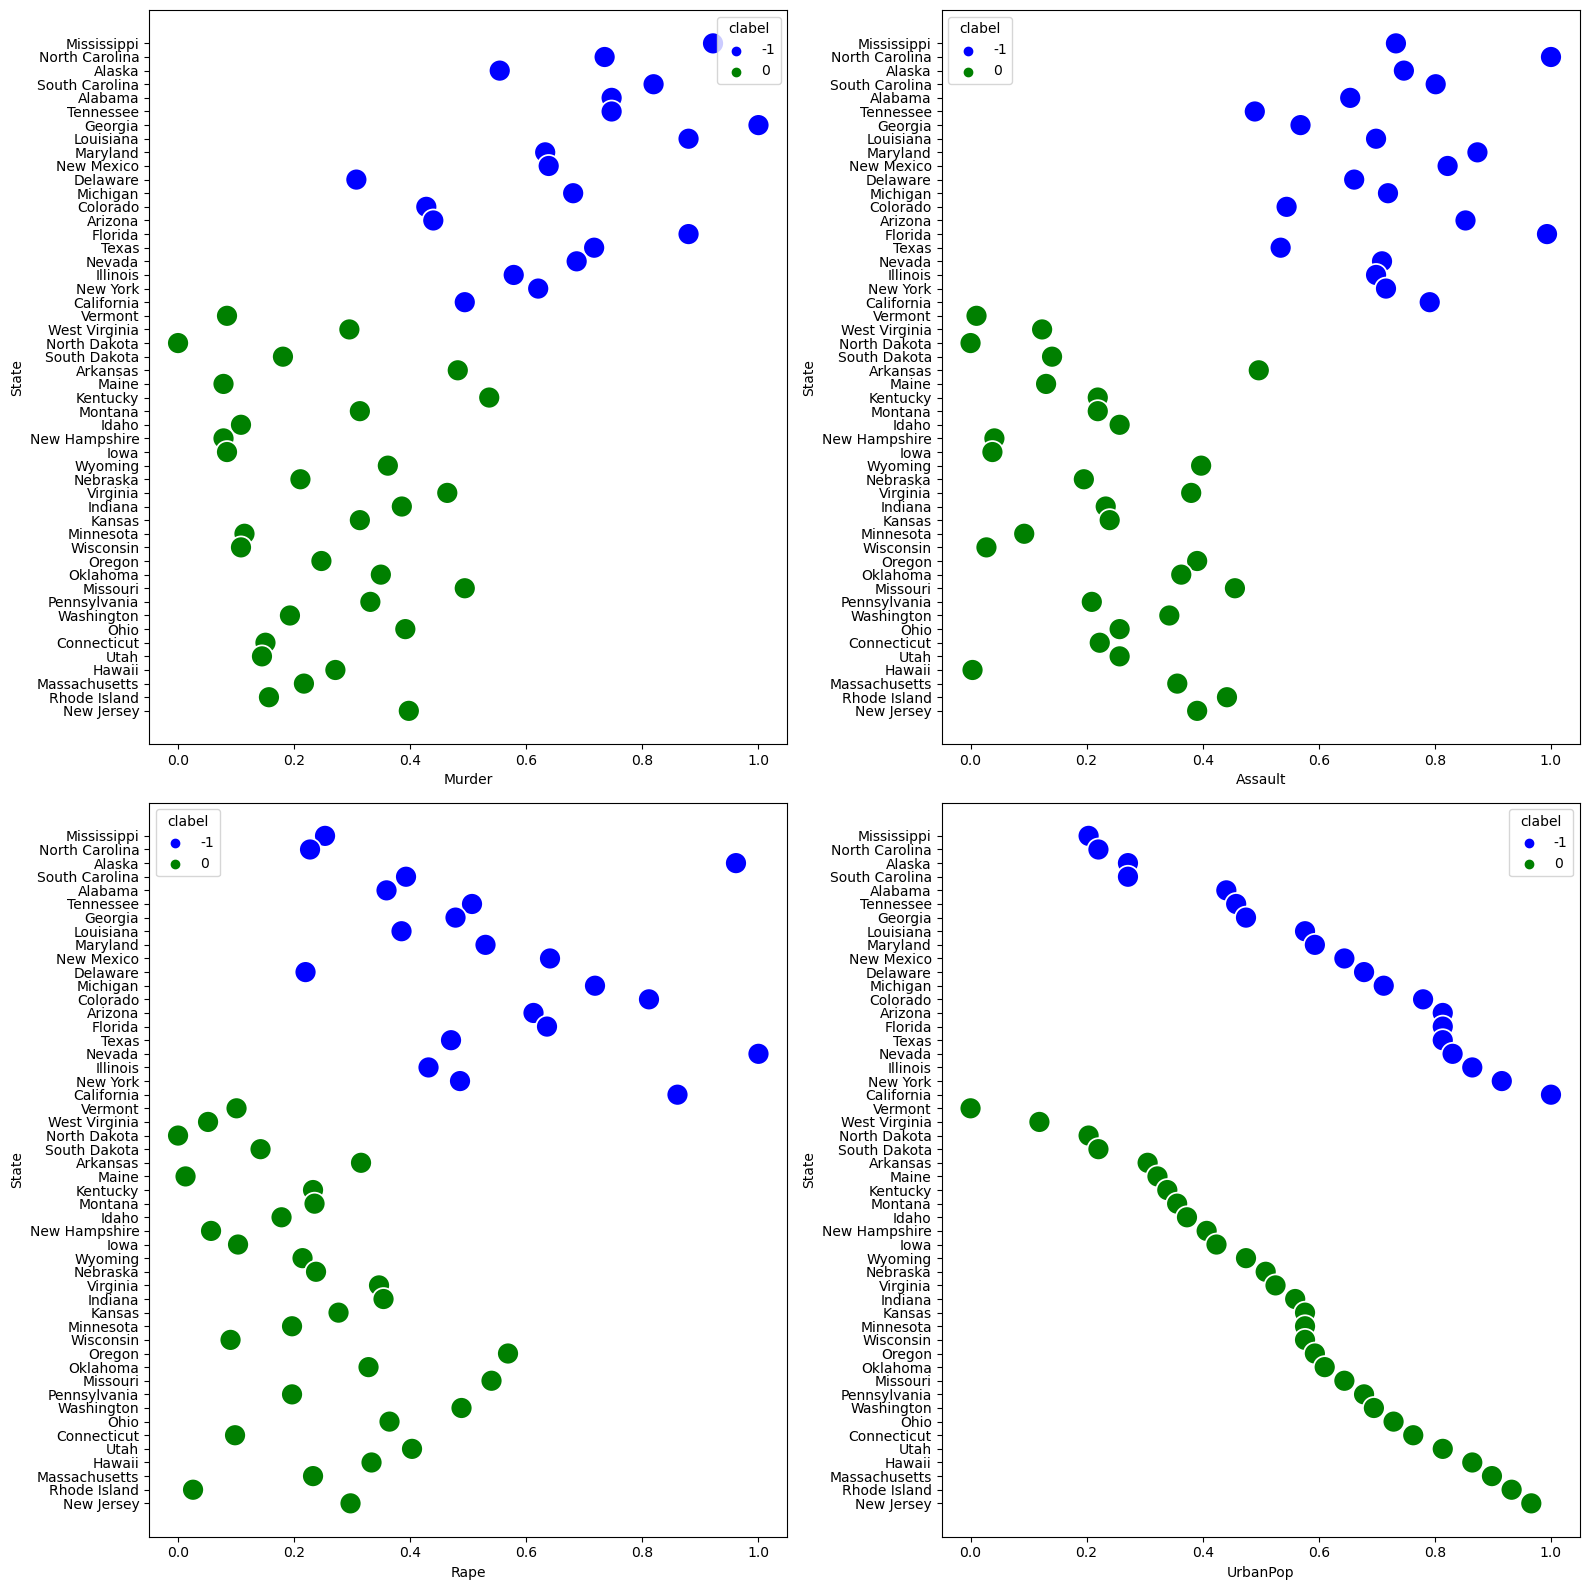

In [317]:
fig, axes = plt.subplots(2,2, figsize = (16,16))
sns.scatterplot(dbscanned, y = 'State', x = 'Murder', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[0,0])
sns.scatterplot(dbscanned, y = 'State', x = 'Assault', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[0,1])
sns.scatterplot(dbscanned, y = 'State', x = 'Rape', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[1,0])
sns.scatterplot(dbscanned, y = 'State', x = 'UrbanPop', hue = 'clabel', s = 250, palette=['blue', 'green'], ax=axes[1,1])
plt.tight_layout()

#### We've ended up with only one cluster which denotes the low crime rate states. The outlier states have high crime rates

### Raw data returns the best silhouette score for two clusters

## Conclusion

We have applied Agglomerative, K-Mean, and DBSCAN clustering on raw and scaled data as a form of Unsupervised Learning to get clusters. Mostly, we get clusters seperating states with low and high crime rates. Agglomerative Clustering gives the best Silhouette Score for 3 clusters